In [83]:
import requests
from urllib.request import urlopen
from urllib.parse import urlencode,unquote,quote_plus
import urllib
import lxml
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import time

In [84]:
판례목록_df = pd.read_html("법령검색목록.html")
판례목록_df = 판례목록_df[0]
판례목록_df

,순번,판례ID,제목,법원,사건유형,판결유형,선고일자
0,1,216815,가축분뇨배출시설변경허가신청불허가처분취소청구,대법원,대법원,일반행정,2021.06.30
1,2,216821,강도상해,대법원,대법원,형사,2021.06.30
2,3,216819,강제추행(인정된 죄명: 공연음란),대법원,대법원,형사,2021.06.30
3,4,216807,대여금,대법원,대법원,민사,2021.06.30
4,5,216803,손해배상(기),대법원,대법원,민사,2021.06.30
...,...,...,...,...,...,...,...
39995,39996,103550,거절사정,대법원,대법원,특허,1987.09.08
39996,39997,103535,건물철거,대법원,대법원,민사,1987.09.08
39997,39998,103544,건물철거등,대법원,대법원,민사,1987.09.08
39998,39999,103581,"공문서위조,공문서위조행사,사문서위조행사,공정증서원본불실기재행사,공정증서원본불실기재,...",대법원,대법원,형사,1987.09.08


In [3]:
# # 판례 XML 상세조회
# info = []
# def crawling_func(url):
#     global info
#     try:
#         response = requests.get(url)
#         response.raise_for_status()
#         soup = BeautifulSoup(response.content, 'lxml-xml') #lxml-xml -> lxml 추가 설치 필요(Beautifulsoup과 별도로 설치)
#         판례내용_sop = BeautifulSoup(soup.판례내용.get_text())
#         판례내용 = 판례내용_soup.get_text()
#         info.append([ID,판례내용])
#     except:
#         print(url,"오류발생, 재귀호출 시작")
#         time.sleep(1)
#         crawling_func(url)
#     finally:
#         return

# for idx,ID in enumerate(판례목록_df["판례ID"]):    
#     #기본 url
#     url = "http://www.law.go.kr/DRF/lawService.do?OC=bmsong&target=prec&ID={}&type=XML".format(ID)
#     crawling_func(url)
#     print(idx,ID)
    
# # info

/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file /opt/anaconda3/lib/python3.8/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


0 216815
1 216821
2 216819
3 216807
4 216803
5 216801
6 216811
7 216813
8 216817
9 216809
10 216839
11 216841
12 216825
13 216831
14 217047
15 216835
16 216845
17 216843
18 216823
19 216833
20 216797
21 216865
22 216847
23 216855
24 216851
25 216849
26 216857
27 216853
28 216867
29 216861
30 216859
31 216863
32 216727
33 216659
34 216657
35 216683
36 216671
37 216673
38 216667
39 216663
40 216669
41 216675
42 216661
43 216681
44 216665
45 216677
46 216679
47 216685
48 216655
49 215855
50 215411
51 215415
52 215413
53 215417
54 215419
55 215427
56 215423
57 215425
58 215421
59 216689
60 215135
61 216981
62 215159
63 215147
64 215153
65 215155
66 215137
67 215139
68 215143
69 216983
70 215161
71 216985
72 215141
73 215157
74 215145
75 215149
76 215151
77 215165
78 215133
79 216789
80 214571
81 214577
82 216997
83 214583
84 214595
85 216993
86 214579
87 214593
88 214601
89 214603
90 214573
91 216987
92 216989
93 216999
94 214587
95 214589
96 216995
97 214581
98 214585
99 214599
100 214605

755 208407
756 208414
757 208403
758 208399
759 208415
760 208402
761 208400
762 208410
763 208405
764 208807
765 208413
766 208398
767 208397
768 208406
769 208401
770 208808
771 207526
772 207539
773 207527
774 207542
775 207532
776 207528
777 207538
778 207530
779 207531
780 207529
781 207541
782 207535
783 208809
784 207533
785 207534
786 207540
787 207536
788 207537
789 207543
790 207477
791 207480
792 207484
793 207487
794 207478
795 207486
796 207485
797 207481
798 207483
799 208810
800 207479
801 207482
802 207488
803 207493
804 207490
805 207491
806 207492
807 207489
808 207139
809 207143
810 207138
811 207140
812 207142
813 207141
814 207137
815 207144
816 207145
817 207146
818 207513
819 208811
820 207147
821 207109
822 207111
823 207119
824 207106
825 207120
826 207117
827 207112
828 207116
829 208412
830 207100
831 207095
832 207115
833 207102
834 207122
835 207476
836 208812
837 207107
838 206289
839 206293
840 206290
841 206292
842 206286
843 206294
844 206287
845 206291

1459 204886
1460 199864
1461 204885
1462 199853
1463 199849
1464 204589
1465 199845
1466 199850
1467 206107
1468 199736
1469 199847
1470 204590
1471 199848
1472 199854
1473 199733
1474 199858
1475 199855
1476 199734
1477 204592
1478 199869
1479 199867
1480 206111
1481 206109
1482 199872
1483 206110
1484 206108
1485 204595
1486 204594
1487 199870
1488 204593
1489 199871
1490 199873
1491 199865
1492 199866
1493 199868
1494 199874
1495 204596
1496 198836
1497 199875
1498 198832
1499 206113
1500 198844
1501 198734
1502 204603
1503 204598
1504 204600
1505 204601
1506 198834
1507 204891
1508 198733
1509 198831
1510 198833
1511 198842
1512 206115
1513 204888
1514 198841
1515 204777
1516 198840
1517 198830
1518 198837
1519 204892
1520 206112
1521 198848
1522 198829
1523 204889
1524 198838
1525 198845
1526 198846
1527 204776
1528 199876
1529 198732
1530 198843
1531 204599
1532 198828
1533 198835
1534 204887
1535 204890
1536 204602
1537 206114
1538 206132
1539 198847
1540 198839
1541 206116
1542

2143 197933
2144 185874
2145 185883
2146 197936
2147 185881
2148 185875
2149 185885
2150 195391
2151 197935
2152 185873
2153 197932
2154 195389
2155 188005
2156 185884
2157 188004
2158 185886
2159 197937
2160 185890
2161 197930
2162 185893
2163 185892
2164 197938
2165 185887
2166 185888
2167 185891
2168 185895
2169 185889
2170 185894
2171 199898
2172 185816
2173 185795
2174 199900
2175 185810
2176 197939
2177 185753
2178 199899
2179 185809
2180 185799
2181 185805
2182 193128
2183 197940
2184 195395
2185 185820
2186 185813
2187 185814
2188 197943
2189 197946
2190 185801
2191 185797
2192 199748
2193 185756
2194 185755
2195 185796
2196 185808
2197 192757
2198 197948
2199 195393
2200 197949
2201 195396
2202 197941
2203 185822
2204 185812
2205 188002
2206 197947
2207 185751
2208 197945
2209 195394
2210 197944
2211 185754
2212 188000
2213 197942
2214 199743
2215 185815
2216 185821
2217 185802
2218 197950
2219 185804
2220 195398
2221 195399
2222 185807
2223 199902
2224 185806
2225 185818
2226

2829 184614
2830 184238
2831 184243
2832 184932
2833 184611
2834 184933
2835 184239
2836 184937
2837 184235
2838 184936
2839 184935
2840 184245
2841 184233
2842 184244
2843 184242
2844 184931
2845 184934
2846 184613
2847 184237
2848 185031
2849 184240
2850 184234
2851 184232
2852 192733
2853 184246
2854 184615
2855 184092
2856 215857
2857 184093
2858 184099
2859 184113
2860 184102
2861 184106
2862 184116
2863 184839
2864 202151
2865 184107
2866 209189
2867 184112
2868 184838
2869 184837
2870 184100
2871 184096
2872 184103
2873 184115
2874 184094
2875 184105
2876 184098
2877 184097
2878 184111
2879 184108
2880 184104
2881 184110
2882 184109
2883 184095
2884 184785
2885 183965
2886 184780
2887 183955
2888 187953
2889 183951
2890 183952
2891 187951
2892 183964
2893 184540
2894 183963
2895 183960
2896 184776
2897 183959
2898 184543
2899 183957
2900 184778
2901 187955
2902 183961
2903 184539
2904 184541
2905 183953
2906 184544
2907 184538
2908 184542
2909 184786
2910 184777
2911 184783
2912

3515 183307
3516 180374
3517 182862
3518 182867
3519 182074
3520 182874
3521 194875
3522 182869
3523 184074
3524 182348
3525 182868
3526 182873
3527 182072
3528 182347
3529 182865
3530 182430
3531 182863
3532 182864
3533 182071
3534 182875
3535 182073
3536 182429
3537 182870
3538 182872
3539 187770
3540 209181
3541 209225
3542 180328
3543 181221
3544 181217
3545 180330
3546 181216
3547 187766
3548 180322
3549 181224
3550 180319
3551 180318
3552 180316
3553 180329
3554 187767
3555 181218
3556 180317
3557 180333
3558 182075
3559 182431
3560 180331
3561 181223
3562 187765
3563 180312
3564 181222
3565 180321
3566 182077
3567 182432
3568 180323
3569 180320
3570 180315
3571 180332
3572 180325
3573 180324
3574 184398
3575 182076
3576 187764
3577 180311
3578 180239
3579 181215
3580 180247
3581 180238
3582 182434
3583 180252
3584 181213
3585 181212
3586 180240
3587 187762
3588 180245
3589 180253
3590 182411
3591 182436
3592 182435
3593 180242
3594 182081
3595 180250
3596 182415
3597 187758
3598

4199 178128
4200 178135
4201 178138
4202 180179
4203 180181
4204 179080
4205 178141
4206 180182
4207 178112
4208 179097
4209 180043
4210 180041
4211 178113
4212 178129
4213 178140
4214 179096
4215 180183
4216 178118
4217 179081
4218 179094
4219 178114
4220 179091
4221 179078
4222 179095
4223 178126
4224 178123
4225 178137
4226 179991
4227 179083
4228 179098
4229 178132
4230 178125
4231 179077
4232 180180
4233 178119
4234 180175
4235 178117
4236 178131
4237 178121
4238 178116
4239 178136
4240 180178
4241 178079
4242 178080
4243 187661
4244 179093
4245 180038
4246 179076
4247 178074
4248 180177
4249 178081
4250 179092
4251 178071
4252 178073
4253 178075
4254 178072
4255 180040
4256 179070
4257 178078
4258 187664
4259 178076
4260 209141
4261 178077
4262 180039
4263 180174
4264 179069
4265 178016
4266 178013
4267 179073
4268 187660
4269 179060
4270 178024
4271 180173
4272 180222
4273 178022
4274 192555
4275 180217
4276 178014
4277 178026
4278 179061
4279 178020
4280 178018
4281 178021
4282

4883 175407
4884 175410
4885 178717
4886 177431
4887 177451
4888 177440
4889 175417
4890 177432
4891 175408
4892 187493
4893 177410
4894 177429
4895 175413
4896 175406
4897 175392
4898 175393
4899 177442
4900 175391
4901 175394
4902 175439
4903 177441
4904 175399
4905 177436
4906 177439
4907 177452
4908 175436
4909 175411
4910 175395
4911 187494
4912 175457
4913 175438
4914 175409
4915 175403
4916 175402
4917 177435
4918 178695
4919 175405
4920 175396
4921 175414
4922 187495
4923 175431
4924 178718
4925 177434
4926 177454
4927 175432
4928 177430
4929 176519
4930 175416
4931 175418
4932 177437
4933 175398
4934 178720
4935 175433
4936 178697
4937 177453
4938 175435
4939 177421
4940 175324
4941 175342
4942 193192
4943 175340
4944 178696
4945 175341
4946 175361
4947 175338
4948 175352
4949 178694
4950 178715
4951 175336
4952 175351
4953 177457
4954 177446
4955 175371
4956 175330
4957 177445
4958 178719
4959 175350
4960 175325
4961 177448
4962 177450
4963 175337
4964 175322
4965 177472
4966

5569 177479
5570 177464
5571 177486
5572 177482
5573 187456
5574 172713
5575 193188
5576 177333
5577 172715
5578 172731
5579 172732
5580 172742
5581 177488
5582 172722
5583 177331
5584 172733
5585 172740
5586 172800
5587 172734
5588 177325
5589 172738
5590 172739
5591 177460
5592 177320
5593 172711
5594 177323
5595 172714
5596 177462
5597 177463
5598 177324
5599 177318
5600 172750
5601 187457
5602 177321
5603 177317
5604 177316
5605 177475
5606 172723
5607 177322
5608 193187
5609 172746
5610 172741
5611 172724
5612 172720
5613 177489
5614 172716
5615 172754
5616 172753
5617 177465
5618 205603
5619 177466
5620 205584
5621 172685
5622 193185
5623 205598
5624 174846
5625 205582
5626 205580
5627 205581
5628 172704
5629 174847
5630 172679
5631 172680
5632 176218
5633 176228
5634 205578
5635 205588
5636 215167
5637 172682
5638 174845
5639 176255
5640 205579
5641 205595
5642 174842
5643 174841
5644 205589
5645 176220
5646 205591
5647 205585
5648 176227
5649 176226
5650 176253
5651 176254
5652

6252 172371
6253 172500
6254 192208
6255 170956
6256 170953
6257 172498
6258 172497
6259 171139
6260 171143
6261 172415
6262 171930
6263 171934
6264 192189
6265 170964
6266 171933
6267 170962
6268 171144
6269 170963
6270 192186
6271 170951
6272 170965
6273 171929
6274 171931
6275 171142
6276 171932
6277 172416
6278 171141
6279 170961
6280 170959
6281 171151
6282 192185
6283 172411
6284 172412
6285 172414
6286 170960
6287 172413
6288 171138
6289 172501
6290 170900
6291 170901
6292 172417
6293 170874
6294 170881
6295 170884
6296 171936
6297 172502
6298 172418
6299 192164
6300 172429
6301 172424
6302 172004
6303 172422
6304 172423
6305 171937
6306 172592
6307 170879
6308 170897
6309 172003
6310 171939
6311 172421
6312 170882
6313 172001
6314 172006
6315 170898
6316 172005
6317 171940
6318 170876
6319 171938
6320 171941
6321 172002
6322 170875
6323 170899
6324 170906
6325 170885
6326 172425
6327 170886
6328 172420
6329 170883
6330 170887
6331 192137
6332 172428
6333 172419
6334 172426
6335

6937 193171
6938 167494
6939 170715
6940 170698
6941 170705
6942 167436
6943 170696
6944 167439
6945 170712
6946 170700
6947 170699
6948 167479
6949 170701
6950 170695
6951 170697
6952 167438
6953 212107
6954 170702
6955 170711
6956 170708
6957 170731
6958 170714
6959 170704
6960 167472
6961 167478
6962 167491
6963 170707
6964 167477
6965 167434
6966 167578
6967 167492
6968 192833
6969 170405
6970 192834
6971 170389
6972 170406
6973 166986
6974 192805
6975 170414
6976 166978
6977 170399
6978 170349
6979 166932
6980 166941
6981 170398
6982 170415
6983 170376
6984 166983
6985 166982
6986 170400
6987 170370
6988 166934
6989 170413
6990 170390
6991 166977
6992 170387
6993 170403
6994 202167
6995 170687
6996 166976
6997 166985
6998 170388
6999 192836
7000 170412
7001 170386
7002 167891
7003 166980
7004 166990
7005 166988
7006 166981
7007 166984
7008 170375
7009 170397
7010 166987
7011 170369
7012 167192
7013 166931
7014 192837
7015 170367
7016 170366
7017 170368
7018 166979
7019 168153
7020

7621 163871
7622 167266
7623 167270
7624 163895
7625 163896
7626 163912
7627 163877
7628 163906
7629 186647
7630 166775
7631 164311
7632 166773
7633 163730
7634 163736
7635 163732
7636 166769
7637 186651
7638 163734
7639 166770
7640 166746
7641 163726
7642 163727
7643 186643
7644 166801
7645 163735
7646 186645
7647 166799
7648 166872
7649 166796
7650 186646
7651 166797
7652 166798
7653 163740
7654 163739
7655 166780
7656 186644
7657 163733
7658 163737
7659 166774
7660 166771
7661 186650
7662 163729
7663 186649
7664 166800
7665 166777
7666 163738
7667 186648
7668 166776
7669 166772
7670 186642
7671 166779
7672 166733
7673 163731
7674 163562
7675 166778
7676 163557
7677 163499
7678 163560
7679 167081
7680 167076
7681 163563
7682 163495
7683 167073
7684 163518
7685 167074
7686 167072
7687 163522
7688 167071
7689 193754
7690 163569
7691 167079
7692 167055
7693 163549
7694 167080
7695 167051
7696 163548
7697 167053
7698 163537
7699 165008
7700 163530
7701 163534
7702 163572
7703 167078
7704

8305 161071
8306 162245
8307 158067
8308 162480
8309 158082
8310 158092
8311 162419
8312 158096
8313 158066
8314 162283
8315 158084
8316 162448
8317 158093
8318 162528
8319 158078
8320 158068
8321 193745
8322 158081
8323 162303
8324 162415
8325 162309
8326 158085
8327 162557
8328 158076
8329 162288
8330 162243
8331 157709
8332 157811
8333 157698
8334 161728
8335 157668
8336 161737
8337 157678
8338 161676
8339 157679
8340 157681
8341 157707
8342 157676
8343 157657
8344 157688
8345 157685
8346 157687
8347 157669
8348 157696
8349 157666
8350 161519
8351 193744
8352 157672
8353 157684
8354 161732
8355 161517
8356 192354
8357 161717
8358 161677
8359 161678
8360 157647
8361 157643
8362 157670
8363 157648
8364 157691
8365 161734
8366 157675
8367 157649
8368 161725
8369 157677
8370 157680
8371 157831
8372 161735
8373 157697
8374 157642
8375 161736
8376 165054
8377 157695
8378 157686
8379 161679
8380 161727
8381 161726
8382 157694
8383 157644
8384 161738
8385 161739
8386 157710
8387 157650
8388

8988 149182
8989 157296
8990 148846
8991 157313
8992 148844
8993 148843
8994 148878
8995 148881
8996 148839
8997 148845
8998 157314
8999 148882
9000 148886
9001 157223
9002 157311
9003 157290
9004 148841
9005 157250
9006 157294
9007 148880
9008 148879
9009 193725
9010 148877
9011 148884
9012 157222
9013 157289
9014 157249
9015 157251
9016 148855
9017 148842
9018 157617
9019 148840
9020 157293
9021 157265
9022 148141
9023 157237
9024 148157
9025 148162
9026 148166
9027 157266
9028 148156
9029 148164
9030 157213
9031 148143
9032 158156
9033 148160
9034 148142
9035 157232
9036 157310
9037 157276
9038 148159
9039 148138
9040 148158
9041 157239
9042 157277
9043 148139
9044 157231
9045 157234
9046 157233
9047 157211
9048 148165
9049 157267
9050 157212
9051 148154
9052 157278
9053 157235
9054 148155
9055 148168
9056 157236
9057 157268
9058 157279
9059 148161
9060 148163
9061 157624
9062 157598
9063 148225
9064 157288
9065 157238
9066 148232
9067 157214
9068 157292
9069 157221
9070 157216
9071

9672 144858
9673 146236
9674 144859
9675 146238
9676 145250
9677 144865
9678 146230
9679 144854
9680 144862
9681 146228
9682 144855
9683 145267
9684 146991
9685 146235
9686 146245
9687 144850
9688 144868
9689 144867
9690 144853
9691 146243
9692 146242
9693 144857
9694 146241
9695 146231
9696 146232
9697 146233
9698 144846
9699 147008
9700 144698
9701 146254
9702 146255
9703 145251
9704 146258
9705 144703
9706 146246
9707 146260
9708 144708
9709 144713
9710 144714
9711 144716
9712 146262
9713 144710
9714 146250
9715 146212
9716 144693
9717 144712
9718 144697
9719 144692
9720 146249
9721 144702
9722 144691
9723 144694
9724 146261
9725 144704
9726 144685
9727 144686
9728 144707
9729 146211
9730 146256
9731 146248
9732 144715
9733 146252
9734 146253
9735 144706
9736 144695
9737 146263
9738 147078
9739 144711
9740 146251
9741 144709
9742 144687
9743 144701
9744 144690
9745 144700
9746 144688
9747 144696
9748 146213
9749 146259
9750 144699
9751 146244
9752 145729
9753 144444
9754 144542
9755

10330 192312
10331 144530
10332 215453
10333 144511
10334 144531
10335 215529
10336 144507
10337 215545
10338 215533
10339 143636
10340 193690
10341 143623
10342 143622
10343 143644
10344 143628
10345 215539
10346 215573
10347 143630
10348 142080
10349 215613
10350 215595
10351 162218
10352 143625
10353 143634
10354 143637
10355 215535
10356 143631
10357 215537
10358 166765
10359 143649
10360 143639
10361 143647
10362 143632
10363 143643
10364 142085
10365 142086
10366 215621
10367 143633
10368 143617
10369 215605
10370 143635
10371 215641
10372 215583
10373 215543
10374 193691
10375 143641
10376 215549
10377 143645
10378 143642
10379 143638
10380 215541
10381 143629
10382 160932
10383 215547
10384 143626
10385 143627
10386 215569
10387 215531
10388 149631
10389 143618
10390 143624
10391 143704
10392 215651
10393 193686
10394 143660
10395 143662
10396 143663
10397 143661
10398 143659
10399 143673
10400 143668
10401 215751
10402 215745
10403 143675
10404 215591
10405 215643
10406 143676

10961 141725
10962 141733
10963 141736
10964 138672
10965 142109
10966 142105
10967 138638
10968 141734
10969 142098
10970 141741
10971 141739
10972 141750
10973 138636
10974 142110
10975 142112
10976 138435
10977 138483
10978 146456
10979 138128
10980 138137
10981 141729
10982 138151
10983 141755
10984 138134
10985 141707
10986 141709
10987 141730
10988 141759
10989 141723
10990 141720
10991 141761
10992 141722
10993 138143
10994 138132
10995 138133
10996 141721
10997 138155
10998 140047
10999 140067
11000 140048
11001 138389
11002 141758
11003 138144
11004 138145
11005 141719
11006 141715
11007 138135
11008 141404
11009 138138
11010 138425
11011 138391
11012 138146
11013 138424
11014 138126
11015 141708
11016 138390
11017 138149
11018 138150
11019 138130
11020 192689
11021 138127
11022 138427
11023 141727
11024 138140
11025 141717
11026 141762
11027 138426
11028 138148
11029 141718
11030 141716
11031 138139
11032 138136
11033 138157
11034 138124
11035 138152
11036 141763
11037 141728

11594 142127
11595 127787
11596 192036
11597 140464
11598 127774
11599 134180
11600 134183
11601 134279
11602 125866
11603 134182
11604 134204
11605 125877
11606 134211
11607 134280
11608 129612
11609 126028
11610 125996
11611 134207
11612 164492
11613 134203
11614 140185
11615 134209
11616 138543
11617 125868
11618 125899
11619 134208
11620 134181
11621 134186
11622 134205
11623 150191
11624 192728
11625 125997
11626 134261
11627 126036
11628 125991
11629 134184
11630 134210
11631 134281
11632 125992
11633 134262
11634 134260
11635 125905
11636 125994
11637 134263
11638 134212
11639 134185
11640 125995
11641 126060
11642 134206
11643 125864
11644 125910
11645 136361
11646 136379
11647 125309
11648 133433
11649 133434
11650 133471
11651 133466
11652 193675
11653 133437
11654 133468
11655 125317
11656 125322
11657 125326
11658 125323
11659 125328
11660 145284
11661 133463
11662 125327
11663 133462
11664 133440
11665 133438
11666 125302
11667 125320
11668 125312
11669 133460
11670 125307

12241 64797
12242 191991
12243 64961
12244 64954
12245 64944
12246 85793
12247 64946
12248 85791
12249 136121
12250 64953
12251 85797
12252 64934
12253 64955
12254 64956
12255 64957
12256 64959
12257 64958
12258 64932
12259 64942
12260 85802
12261 65075
12262 85800
12263 64781
12264 85801
12265 64963
12266 64933
12267 64962
12268 64949
12269 64950
12270 64951
12271 64941
12272 151611
12273 64947
12274 85792
12275 85795
12276 64943
12277 64945
12278 85794
12279 64964
12280 85799
12281 64936
12282 136120
12283 64948
12284 161111
12285 64960
12286 85805
12287 64966
12288 64952
12289 85804
12290 125182
12291 85808
12292 85807
12293 64914
12294 85771
12295 64791
12296 85803
12297 64637
12298 64790
12299 64789
12300 85789
12301 193668
12302 64920
12303 64922
12304 85778
12305 85772
12306 64921
12307 85777
12308 85769
12309 64924
12310 85784
12311 85780
12312 85783
12313 64917
12314 64919
12315 85776
12316 64908
12317 64916
12318 85774
12319 85773
12320 64900
12321 64923
12322 85788
12323 649

12919 69256
12920 69257
12921 69247
12922 85554
12923 85534
12924 85551
12925 69235
12926 85538
12927 69248
12928 85552
12929 85548
12930 69262
12931 69251
12932 85547
12933 69259
12934 69233
12935 69363
12936 69222
12937 126150
12938 85522
12939 69229
12940 69232
12941 85525
12942 85518
12943 85531
12944 69214
12945 85516
12946 69213
12947 69209
12948 69211
12949 85514
12950 69210
12951 69218
12952 69221
12953 69216
12954 126087
12955 85530
12956 69212
12957 69231
12958 69217
12959 85524
12960 69215
12961 192025
12962 85515
12963 69230
12964 69315
12965 69208
12966 69228
12967 193650
12968 69207
12969 85527
12970 69205
12971 69206
12972 192008
12973 69219
12974 85523
12975 85511
12976 69224
12977 85529
12978 85528
12979 85521
12980 85526
12981 69225
12982 69226
12983 69204
12984 69227
12985 69203
12986 85533
12987 85520
12988 69223
12989 85517
12990 69190
12991 69195
12992 85502
12993 85495
12994 85496
12995 85509
12996 69202
12997 69200
12998 69198
12999 69194
13000 85497
13001 69201

13596 68883
13597 85251
13598 85250
13599 148851
13600 68865
13601 85237
13602 68859
13603 68871
13604 68875
13605 68872
13606 68857
13607 216333
13608 68860
13609 194143
13610 68874
13611 85239
13612 85246
13613 68868
13614 216321
13615 68867
13616 68877
13617 216339
13618 216329
13619 85242
13620 85245
13621 216335
13622 85244
13623 85231
13624 216337
13625 68878
13626 85243
13627 68858
13628 216327
13629 85227
13630 216331
13631 216323
13632 216325
13633 68856
13634 68861
13635 68855
13636 85241
13637 68869
13638 194142
13639 85240
13640 216341
13641 68864
13642 68866
13643 68873
13644 68876
13645 68870
13646 68886
13647 216343
13648 68854
13649 68831
13650 68853
13651 216355
13652 68844
13653 216351
13654 68845
13655 68840
13656 85211
13657 194140
13658 216353
13659 68830
13660 68833
13661 68832
13662 68837
13663 68846
13664 68843
13665 68842
13666 68852
13667 68835
13668 68839
13669 145348
13670 68823
13671 166186
13672 68836
13673 210371
13674 68829
13675 68827
13676 68838
13677 

14274 194119
14275 84938
14276 68436
14277 84934
14278 84939
14279 68446
14280 68445
14281 84925
14282 68433
14283 68439
14284 68438
14285 84936
14286 68428
14287 68442
14288 84930
14289 194120
14290 84931
14291 68444
14292 68434
14293 84935
14294 84923
14295 68424
14296 68427
14297 84927
14298 68432
14299 68426
14300 68425
14301 68447
14302 194122
14303 84932
14304 194121
14305 68435
14306 84937
14307 68443
14308 126705
14309 68441
14310 68422
14311 159675
14312 68421
14313 194118
14314 68403
14315 84909
14316 68423
14317 84908
14318 68408
14319 194116
14320 68420
14321 68402
14322 68419
14323 68418
14324 84921
14325 68398
14326 84920
14327 68413
14328 194112
14329 84919
14330 84916
14331 68414
14332 68412
14333 194113
14334 84911
14335 68397
14336 84905
14337 68410
14338 68411
14339 84918
14340 191966
14341 68401
14342 68417
14343 84917
14344 68405
14345 68400
14346 68395
14347 68394
14348 84902
14349 84904
14350 68393
14351 84900
14352 68404
14353 68406
14354 194117
14355 68399
1435

14942 68059
14943 68061
14944 84595
14945 68077
14946 193996
14947 84573
14948 68060
14949 84594
14950 68071
14951 84593
14952 84592
14953 68074
14954 84572
14955 166936
14956 68076
14957 84584
14958 68073
14959 84585
14960 68075
14961 68057
14962 68064
14963 194001
14964 68072
14965 177831
14966 127160
14967 126207
14968 84562
14969 193995
14970 68055
14971 68054
14972 84561
14973 84559
14974 84566
14975 68045
14976 84560
14977 68053
14978 68046
14979 68037
14980 145661
14981 68048
14982 84558
14983 68050
14984 193994
14985 68052
14986 84570
14987 84555
14988 68044
14989 84557
14990 84568
14991 68047
14992 84571
14993 209196
14994 84553
14995 84556
14996 84569
14997 68051
14998 84540
14999 68035
15000 193993
15001 68041
15002 84542
15003 68040
15004 84552
15005 84550
15006 68039
15007 68036
15008 68043
15009 84551
15010 68034
15011 68033
15012 84534
15013 84538
15014 193992
15015 68038
15016 145311
15017 68042
15018 193991
15019 215905
15020 202164
15021 68030
15022 215907
15023 68015

15612 84103
15613 84119
15614 84104
15615 67764
15616 193887
15617 84105
15618 193888
15619 84130
15620 193895
15621 193882
15622 84096
15623 67743
15624 67744
15625 67750
15626 84090
15627 84098
15628 67758
15629 84099
15630 67760
15631 84100
15632 67745
15633 67759
15634 67747
15635 84097
15636 84095
15637 67755
15638 67741
15639 67742
15640 193880
15641 126731
15642 193881
15643 67754
15644 67756
15645 67739
15646 67757
15647 67738
15648 84087
15649 67749
15650 67737
15651 67736
15652 67740
15653 84089
15654 84080
15655 193885
15656 193884
15657 67733
15658 84078
15659 84088
15660 67735
15661 67752
15662 67748
15663 67734
15664 193878
15665 193879
15666 193877
15667 67746
15668 67751
15669 193883
15670 84094
15671 84093
15672 67753
15673 67772
15674 67726
15675 67708
15676 67714
15677 84060
15678 67728
15679 67716
15680 84072
15681 67725
15682 67730
15683 193872
15684 193870
15685 84054
15686 67722
15687 67729
15688 84059
15689 84076
15690 193876
15691 84074
15692 67713
15693 67723


16283 83703
16284 83716
16285 83701
16286 83711
16287 67487
16288 67489
16289 67488
16290 67484
16291 83710
16292 67490
16293 83715
16294 83709
16295 127129
16296 83693
16297 67483
16298 67474
16299 83683
16300 67473
16301 83776
16302 67500
16303 67472
16304 191934
16305 67478
16306 67479
16307 83694
16308 67480
16309 83680
16310 67471
16311 83685
16312 83687
16313 83692
16314 83691
16315 83684
16316 67482
16317 83688
16318 83670
16319 83664
16320 83662
16321 83661
16322 83660
16323 67477
16324 67468
16325 83667
16326 83663
16327 83668
16328 127243
16329 67493
16330 67492
16331 67475
16332 67476
16333 83665
16334 83654
16335 67467
16336 83656
16337 83651
16338 83653
16339 67469
16340 83666
16341 83655
16342 67470
16343 83652
16344 83644
16345 83642
16346 83646
16347 67466
16348 83643
16349 148271
16350 152231
16351 153011
16352 147312
16353 83627
16354 67459
16355 83629
16356 83628
16357 83641
16358 83632
16359 67461
16360 67462
16361 67463
16362 83633
16363 67460
16364 83640
16365 836

16963 83218
16964 67402
16965 83220
16966 83219
16967 67418
16968 83229
16969 67413
16970 67419
16971 83215
16972 67412
16973 209169
16974 83227
16975 83225
16976 83230
16977 67414
16978 67396
16979 67407
16980 126651
16981 83212
16982 127021
16983 67409
16984 67411
16985 67408
16986 67417
16987 83213
16988 67410
16989 83237
16990 83228
16991 83217
16992 83214
16993 67406
16994 83235
16995 83234
16996 83209
16997 67395
16998 83211
16999 67404
17000 83210
17001 133579
17002 83233
17003 67405
17004 67415
17005 83208
17006 67416
17007 126172
17008 127086
17009 190062
17010 83206
17011 83189
17012 67242
17013 83188
17014 83207
17015 209791
17016 83192
17017 83191
17018 83259
17019 83238
17020 209855
17021 209875
17022 67239
17023 209753
17024 67236
17025 83196
17026 83197
17027 83187
17028 83201
17029 83193
17030 83184
17031 83186
17032 83183
17033 209711
17034 83185
17035 83190
17036 83195
17037 83205
17038 67241
17039 67235
17040 67240
17041 67234
17042 83204
17043 83194
17044 83203
1704

17631 82740
17632 82739
17633 194488
17634 194491
17635 194489
17636 194493
17637 82729
17638 82741
17639 194494
17640 126537
17641 126519
17642 194487
17643 82735
17644 194490
17645 67112
17646 194495
17647 82724
17648 82715
17649 82721
17650 209737
17651 194344
17652 194498
17653 194499
17654 194502
17655 194501
17656 209739
17657 82704
17658 82713
17659 209869
17660 67108
17661 126518
17662 82723
17663 194497
17664 82722
17665 209813
17666 194500
17667 194503
17668 194343
17669 194496
17670 126495
17671 194507
17672 194504
17673 194506
17674 82709
17675 194508
17676 82697
17677 194505
17678 82719
17679 82693
17680 194510
17681 82692
17682 209839
17683 82681
17684 194345
17685 82691
17686 209821
17687 194515
17688 209861
17689 194511
17690 82688
17691 82678
17692 194512
17693 194346
17694 126559
17695 82677
17696 194509
17697 209819
17698 194514
17699 82675
17700 82690
17701 82689
17702 191882
17703 194513
17704 82718
17705 194516
17706 194518
17707 82687
17708 126486
17709 82682
177

18283 82175
18284 194419
18285 82178
18286 82100
18287 194370
18288 82121
18289 194752
18290 82125
18291 194399
18292 82108
18293 82110
18294 126312
18295 194751
18296 194750
18297 194422
18298 194755
18299 194749
18300 194754
18301 82124
18302 194753
18303 126282
18304 82120
18305 82114
18306 82101
18307 194759
18308 194767
18309 82119
18310 82113
18311 82116
18312 194770
18313 82106
18314 194766
18315 194758
18316 194375
18317 194763
18318 194760
18319 194765
18320 82157
18321 194411
18322 194768
18323 194764
18324 194757
18325 194771
18326 82082
18327 82104
18328 194756
18329 82091
18330 194761
18331 194762
18332 82118
18333 82117
18334 194769
18335 194772
18336 194773
18337 82080
18338 194781
18339 82059
18340 194775
18341 82055
18342 82079
18343 82062
18344 194416
18345 194423
18346 194776
18347 194424
18348 82064
18349 82065
18350 68269
18351 82046
18352 82031
18353 82034
18354 194786
18355 82057
18356 194372
18357 194371
18358 82063
18359 82078
18360 194777
18361 82049
18362 194

18957 81459
18958 81483
18959 81492
18960 191865
18961 81457
18962 81482
18963 145663
18964 81458
18965 81475
18966 81651
18967 81456
18968 81424
18969 81429
18970 81452
18971 81449
18972 81427
18973 81438
18974 81411
18975 81413
18976 191863
18977 81441
18978 191864
18979 81415
18980 81450
18981 130680
18982 81440
18983 81418
18984 81453
18985 81426
18986 81434
18987 81421
18988 81437
18989 81414
18990 81410
18991 81409
18992 81417
18993 81436
18994 81435
18995 81447
18996 81419
18997 81422
18998 81451
18999 81431
19000 81416
19001 81448
19002 81439
19003 81423
19004 81432
19005 81425
19006 81430
19007 81491
19008 81444
19009 81428
19010 81406
19011 81408
19012 145334
19013 81445
19014 81433
19015 81407
19016 81446
19017 141664
19018 81405
19019 81372
19020 81379
19021 81378
19022 81385
19023 81384
19024 81381
19025 81389
19026 81396
19027 81375
19028 81403
19029 81382
19030 81383
19031 81373
19032 145341
19033 81380
19034 191862
19035 81392
19036 81388
19037 81386
19038 81391
19039 8

19618 191606
19619 200575
19620 141687
19621 191593
19622 191586
19623 191577
19624 191584
19625 191580
19626 80833
19627 191600
19628 191682
19629 191583
19630 191578
19631 191581
19632 191587
19633 80837
19634 191582
19635 191585
19636 191579
19637 80836
19638 80817
19639 80803
19640 191594
19641 80835
19642 191610
19643 191565
19644 191573
19645 191563
19646 191566
19647 191576
19648 191575
19649 80797
19650 191570
19651 191574
19652 191569
19653 80770
19654 191561
19655 191557
19656 191558
19657 191568
19658 80798
19659 80766
19660 191556
19661 80774
19662 80773
19663 191560
19664 191564
19665 191562
19666 80783
19667 80796
19668 191567
19669 191559
19670 191554
19671 80784
19672 191571
19673 80795
19674 191555
19675 191552
19676 191572
19677 80793
19678 80760
19679 80761
19680 191553
19681 191550
19682 191551
19683 80794
19684 191609
19685 191540
19686 80756
19687 80743
19688 191536
19689 191547
19690 191546
19691 191533
19692 191534
19693 80749
19694 191542
19695 191543
19696 807

20266 80195
20267 191129
20268 191142
20269 191127
20270 80216
20271 191140
20272 80258
20273 80192
20274 80191
20275 191110
20276 191111
20277 191112
20278 191121
20279 191122
20280 80189
20281 191108
20282 191109
20283 80190
20284 80187
20285 191119
20286 80159
20287 80169
20288 80160
20289 191106
20290 191118
20291 191123
20292 191124
20293 80186
20294 191104
20295 191116
20296 191101
20297 191103
20298 191105
20299 80166
20300 80163
20301 191107
20302 191113
20303 191120
20304 191102
20305 191117
20306 145327
20307 80188
20308 191099
20309 80157
20310 191084
20311 191083
20312 80138
20313 191089
20314 191090
20315 191096
20316 191085
20317 80175
20318 191087
20319 191086
20320 191098
20321 80156
20322 191078
20323 191073
20324 191071
20325 191074
20326 191081
20327 191080
20328 80132
20329 80123
20330 191072
20331 80125
20332 191070
20333 191069
20334 191097
20335 191091
20336 191076
20337 80154
20338 191075
20339 191095
20340 191094
20341 191082
20342 80155
20343 191088
20344 8013

20914 190669
20915 79561
20916 79574
20917 190667
20918 190684
20919 79571
20920 190665
20921 79570
20922 79552
20923 190682
20924 190664
20925 190668
20926 190694
20927 190663
20928 79573
20929 79533
20930 190666
20931 190690
20932 79572
20933 79525
20934 190662
20935 190661
20936 190653
20937 190648
20938 190650
20939 190651
20940 190652
20941 79505
20942 190645
20943 79523
20944 79499
20945 190649
20946 190647
20947 190639
20948 190658
20949 190654
20950 79522
20951 79495
20952 190636
20953 79500
20954 190641
20955 190637
20956 79494
20957 190644
20958 190659
20959 190643
20960 190638
20961 190660
20962 190656
20963 190642
20964 190640
20965 190646
20966 79521
20967 145595
20968 79524
20969 79551
20970 190635
20971 79486
20972 190605
20973 190607
20974 190608
20975 190606
20976 190609
20977 79515
20978 79520
20979 190596
20980 190592
20981 190604
20982 190578
20983 190577
20984 79445
20985 79448
20986 79476
20987 190579
20988 190576
20989 79475
20990 159572
20991 79478
20992 79441
2

21559 192243
21560 192242
21561 192235
21562 192223
21563 118115
21564 192244
21565 192247
21566 118099
21567 192224
21568 192234
21569 192225
21570 118080
21571 118085
21572 192217
21573 192222
21574 192220
21575 192245
21576 192239
21577 118086
21578 192221
21579 118098
21580 192226
21581 192246
21582 118116
21583 118118
21584 118119
21585 192238
21586 192218
21587 118117
21588 192216
21589 192190
21590 192187
21591 118114
21592 192183
21593 192204
21594 118063
21595 118064
21596 192178
21597 192181
21598 192179
21599 192180
21600 118039
21601 192188
21602 192182
21603 192205
21604 118065
21605 192215
21606 192194
21607 192193
21608 192176
21609 118059
21610 192175
21611 118061
21612 192170
21613 192172
21614 118013
21615 192163
21616 192166
21617 192168
21618 118048
21619 192197
21620 192196
21621 192202
21622 192200
21623 118044
21624 192192
21625 118022
21626 192173
21627 118012
21628 118032
21629 192174
21630 118019
21631 118014
21632 192165
21633 118025
21634 118018
21635 192169

22190 195170
22191 117476
22192 117472
22193 117493
22194 117467
22195 195169
22196 211239
22197 195172
22198 117465
22199 195171
22200 211093
22201 117578
22202 195180
22203 117492
22204 117491
22205 211269
22206 211095
22207 195176
22208 194944
22209 211193
22210 211199
22211 194943
22212 117460
22213 117480
22214 195174
22215 117477
22216 211211
22217 117455
22218 211157
22219 195177
22220 195173
22221 195179
22222 195175
22223 195178
22224 211233
22225 117459
22226 211259
22227 117487
22228 117484
22229 211097
22230 117474
22231 195182
22232 195183
22233 211179
22234 195181
22235 117454
22236 195184
22237 192081
22238 195187
22239 195186
22240 195185
22241 117448
22242 117441
22243 195189
22244 117440
22245 117427
22246 211099
22247 117447
22248 195191
22249 195193
22250 211169
22251 192080
22252 117424
22253 194945
22254 195192
22255 117422
22256 195188
22257 117434
22258 117439
22259 211101
22260 117433
22261 195190
22262 194985
22263 117421
22264 211161
22265 117414
22266 117432

22823 196177
22824 196197
22825 116876
22826 196175
22827 196182
22828 116862
22829 196184
22830 116854
22831 116851
22832 196180
22833 196179
22834 116859
22835 196181
22836 116883
22837 196200
22838 196202
22839 196198
22840 196194
22841 116917
22842 144346
22843 196201
22844 196199
22845 196196
22846 116884
22847 116858
22848 196203
22849 196195
22850 196178
22851 116900
22852 116899
22853 196190
22854 196192
22855 116897
22856 196204
22857 196218
22858 196216
22859 116833
22860 116828
22861 196215
22862 196219
22863 196217
22864 116834
22865 142123
22866 116823
22867 196212
22868 116849
22869 196214
22870 196210
22871 196206
22872 196208
22873 196213
22874 116818
22875 196211
22876 196209
22877 116837
22878 196207
22879 116820
22880 196205
22881 202228
22882 116842
22883 196220
22884 116847
22885 196226
22886 196227
22887 196221
22888 116846
22889 192045
22890 196223
22891 196222
22892 196225
22893 116809
22894 116830
22895 116845
22896 196228
22897 196224
22898 116844
22899 116805

23455 196038
23456 196037
23457 116253
23458 116289
23459 196113
23460 116258
23461 196039
23462 196066
23463 196094
23464 116288
23465 196068
23466 196058
23467 196054
23468 149251
23469 116251
23470 196041
23471 196064
23472 196108
23473 116237
23474 196044
23475 196079
23476 196122
23477 116220
23478 196115
23479 116239
23480 116210
23481 211231
23482 196045
23483 196093
23484 116229
23485 196047
23486 116223
23487 196100
23488 196107
23489 196042
23490 116232
23491 116242
23492 116204
23493 211139
23494 196101
23495 196040
23496 196124
23497 196119
23498 196082
23499 116233
23500 211135
23501 196069
23502 196106
23503 196114
23504 211137
23505 196043
23506 116225
23507 196048
23508 196111
23509 196123
23510 196117
23511 196120
23512 196099
23513 116206
23514 116236
23515 116207
23516 116205
23517 211241
23518 116249
23519 196104
23520 196076
23521 196078
23522 196046
23523 192038
23524 211245
23525 116219
23526 196051
23527 196052
23528 116184
23529 196091
23530 116214
23531 196050

24088 115597
24089 196923
24090 115595
24091 115596
24092 196925
24093 196935
24094 196934
24095 115655
24096 196922
24097 196932
24098 134371
24099 196936
24100 115653
24101 196931
24102 196930
24103 115621
24104 196929
24105 196937
24106 196938
24107 115738
24108 196949
24109 196942
24110 196939
24111 196947
24112 115636
24113 115649
24114 115650
24115 115638
24116 196946
24117 115652
24118 196945
24119 196948
24120 196943
24121 196954
24122 196953
24123 196944
24124 196950
24125 115651
24126 196952
24127 196951
24128 196940
24129 196941
24130 196970
24131 115616
24132 115615
24133 196965
24134 196960
24135 115647
24136 196959
24137 196958
24138 115648
24139 115634
24140 115646
24141 196956
24142 202221
24143 196961
24144 196962
24145 196957
24146 196964
24147 196963
24148 115578
24149 196969
24150 115645
24151 115582
24152 115606
24153 196967
24154 196966
24155 115644
24156 196968
24157 115632
24158 196955
24159 84816
24160 196528
24161 125423
24162 196988
24163 115549
24164 115548


24720 115040
24721 115027
24722 115031
24723 115030
24724 115049
24725 115042
24726 115043
24727 115037
24728 115053
24729 115048
24730 115054
24731 115021
24732 114996
24733 114989
24734 115045
24735 114990
24736 114995
24737 114997
24738 115044
24739 115035
24740 114994
24741 115026
24742 115000
24743 114999
24744 114993
24745 114988
24746 115036
24747 115046
24748 115032
24749 115033
24750 115034
24751 115024
24752 114998
24753 115023
24754 115025
24755 114992
24756 114991
24757 115055
24758 114984
24759 114983
24760 127939
24761 114955
24762 114953
24763 114954
24764 114976
24765 114943
24766 114938
24767 114940
24768 114978
24769 114974
24770 114931
24771 114959
24772 114937
24773 114939
24774 114979
24775 114981
24776 114945
24777 114942
24778 114933
24779 114935
24780 114946
24781 114941
24782 114969
24783 114973
24784 114980
24785 114960
24786 114961
24787 114949
24788 114930
24789 114963
24790 114970
24791 114968
24792 114972
24793 114971
24794 114958
24795 114964
24796 114936

25352 197218
25353 197223
25354 114419
25355 114422
25356 114395
25357 114396
25358 114406
25359 114385
25360 197222
25361 114420
25362 114421
25363 197235
25364 197236
25365 197233
25366 114373
25367 197237
25368 197224
25369 197234
25370 114417
25371 114410
25372 114416
25373 197225
25374 114402
25375 197232
25376 197229
25377 197227
25378 197240
25379 197228
25380 197238
25381 197241
25382 197239
25383 197226
25384 197231
25385 197230
25386 114418
25387 114358
25388 114331
25389 197259
25390 197258
25391 197250
25392 114357
25393 114359
25394 197254
25395 197252
25396 114354
25397 114355
25398 114362
25399 197243
25400 114360
25401 186634
25402 197247
25403 197242
25404 197255
25405 197251
25406 114315
25407 197246
25408 114322
25409 114361
25410 197257
25411 197245
25412 197265
25413 197266
25414 197261
25415 197263
25416 114338
25417 197244
25418 197253
25419 197260
25420 114312
25421 197249
25422 114341
25423 197264
25424 197256
25425 197262
25426 114325
25427 197248
25428 114324

25985 113766
25986 197087
25987 197130
25988 113820
25989 113801
25990 197553
25991 197128
25992 197094
25993 113834
25994 197095
25995 113833
25996 113828
25997 197132
25998 197091
25999 113763
26000 197133
26001 197152
26002 197109
26003 113762
26004 197084
26005 113768
26006 197143
26007 197092
26008 197110
26009 113830
26010 197099
26011 197071
26012 113826
26013 113827
26014 197072
26015 145325
26016 197093
26017 113751
26018 113729
26019 191960
26020 113712
26021 197153
26022 113723
26023 197096
26024 113755
26025 113749
26026 113728
26027 113753
26028 113750
26029 197136
26030 197140
26031 197073
26032 113720
26033 197074
26034 197113
26035 113713
26036 113754
26037 197147
26038 197115
26039 197122
26040 197104
26041 197079
26042 113738
26043 113748
26044 197088
26045 197077
26046 113740
26047 113746
26048 113745
26049 113744
26050 113710
26051 113731
26052 113702
26053 197117
26054 197123
26055 197089
26056 113707
26057 197111
26058 113726
26059 158251
26060 113701
26061 197075

26617 198334
26618 113116
26619 113149
26620 198344
26621 113140
26622 198335
26623 198337
26624 113134
26625 113115
26626 202211
26627 198342
26628 198333
26629 113120
26630 198341
26631 198322
26632 198350
26633 198331
26634 113153
26635 198352
26636 198321
26637 113126
26638 198328
26639 113165
26640 113168
26641 198320
26642 113171
26643 113164
26644 113174
26645 113170
26646 113163
26647 198339
26648 198329
26649 198332
26650 198330
26651 198324
26652 202212
26653 198327
26654 198318
26655 198336
26656 198338
26657 113122
26658 113135
26659 198349
26660 140817
26661 113169
26662 113173
26663 113151
26664 113166
26665 113150
26666 198340
26667 113144
26668 198348
26669 198347
26670 198319
26671 113175
26672 198325
26673 113155
26674 198351
26675 198345
26676 198343
26677 113131
26678 198323
26679 198346
26680 113172
26681 113139
26682 198326
26683 113145
26684 113148
26685 113092
26686 113104
26687 113103
26688 198360
26689 198355
26690 113095
26691 198363
26692 113098
26693 198354

27250 198960
27251 198957
27252 198803
27253 112608
27254 112601
27255 112603
27256 112604
27257 112609
27258 142117
27259 112562
27260 112599
27261 112577
27262 198966
27263 198976
27264 198983
27265 198795
27266 112527
27267 112524
27268 198984
27269 112517
27270 198989
27271 112544
27272 198979
27273 198980
27274 198972
27275 112523
27276 198974
27277 198987
27278 112542
27279 198988
27280 198973
27281 190045
27282 112513
27283 198981
27284 198978
27285 112511
27286 198982
27287 198985
27288 112532
27289 112545
27290 112530
27291 198977
27292 112539
27293 198986
27294 112541
27295 112538
27296 112537
27297 112536
27298 112543
27299 198786
27300 198975
27301 112531
27302 198990
27303 112464
27304 198993
27305 199012
27306 199024
27307 112446
27308 198997
27309 112439
27310 199003
27311 199007
27312 199016
27313 199021
27314 199032
27315 112483
27316 112485
27317 112492
27318 199017
27319 112468
27320 199030
27321 112478
27322 199010
27323 112497
27324 112500
27325 112465
27326 199022

27884 111934
27885 111912
27886 111877
27887 199335
27888 111886
27889 111922
27890 198824
27891 199332
27892 190036
27893 111924
27894 199333
27895 111880
27896 199330
27897 199327
27898 199334
27899 199328
27900 199329
27901 199331
27902 111923
27903 198825
27904 199336
27905 111927
27906 111926
27907 111875
27908 199337
27909 199338
27910 198773
27911 199353
27912 111871
27913 199341
27914 111831
27915 199342
27916 199339
27917 199344
27918 111856
27919 199343
27920 199352
27921 199345
27922 199349
27923 199348
27924 198777
27925 199350
27926 111838
27927 199351
27928 199347
27929 202202
27930 198820
27931 111843
27932 199340
27933 111872
27934 199346
27935 111829
27936 199361
27937 111087
27938 198816
27939 199354
27940 199360
27941 199355
27942 199362
27943 199357
27944 111854
27945 199356
27946 198736
27947 199358
27948 111824
27949 199363
27950 111819
27951 111847
27952 111870
27953 199359
27954 198737
27955 111873
27956 111868
27957 111869
27958 199364
27959 199371
27960 199367

28515 141097
28516 111338
28517 111347
28518 111348
28519 111351
28520 111352
28521 199649
28522 111270
28523 199652
28524 111276
28525 199643
28526 111265
28527 199641
28528 111261
28529 199650
28530 199655
28531 111339
28532 111349
28533 111350
28534 199651
28535 199653
28536 199654
28537 199646
28538 199648
28539 111353
28540 111263
28541 111318
28542 209140
28543 111346
28544 111260
28545 199657
28546 199658
28547 199666
28548 111226
28549 199663
28550 111254
28551 111210
28552 199664
28553 111234
28554 198806
28555 199660
28556 199659
28557 111235
28558 111216
28559 111209
28560 199661
28561 111204
28562 198776
28563 111220
28564 199665
28565 199662
28566 111205
28567 111255
28568 111214
28569 111208
28570 199667
28571 111186
28572 111224
28573 111225
28574 199674
28575 111253
28576 199682
28577 199669
28578 199670
28579 199680
28580 199686
28581 199668
28582 199673
28583 111195
28584 199672
28585 199687
28586 199671
28587 199684
28588 199685
28589 199678
28590 111198
28591 111140

29148 110650
29149 110639
29150 199999
29151 200004
29152 200002
29153 200007
29154 200001
29155 200012
29156 148083
29157 110670
29158 200008
29159 199752
29160 199788
29161 200006
29162 200015
29163 199816
29164 110702
29165 110693
29166 110701
29167 208498
29168 130667
29169 110691
29170 110700
29171 110695
29172 200019
29173 200020
29174 199786
29175 110584
29176 200021
29177 200022
29178 200023
29179 200024
29180 110587
29181 110586
29182 110621
29183 110625
29184 110567
29185 200034
29186 110594
29187 110611
29188 110623
29189 200044
29190 200037
29191 110610
29192 110573
29193 200041
29194 110601
29195 199765
29196 200029
29197 190023
29198 200032
29199 200036
29200 200039
29201 200026
29202 200033
29203 200040
29204 200028
29205 110624
29206 200035
29207 200038
29208 199789
29209 110576
29210 200048
29211 200047
29212 199753
29213 200030
29214 200042
29215 200046
29216 200045
29217 200043
29218 200027
29219 200031
29220 200025
29221 110572
29222 110561
29223 200049
29224 110618

29780 110009
29781 200327
29782 200325
29783 200331
29784 110038
29785 199821
29786 200326
29787 199822
29788 200324
29789 200322
29790 110003
29791 110044
29792 110020
29793 110021
29794 200347
29795 202183
29796 200334
29797 109989
29798 200344
29799 200340
29800 200355
29801 200336
29802 200339
29803 200354
29804 200338
29805 199796
29806 202184
29807 110032
29808 200353
29809 110046
29810 110048
29811 110047
29812 199782
29813 109990
29814 200335
29815 109998
29816 109995
29817 199771
29818 200356
29819 200333
29820 200343
29821 200349
29822 110049
29823 200357
29824 200341
29825 200345
29826 200348
29827 200342
29828 200351
29829 200352
29830 200346
29831 200350
29832 200337
29833 110045
29834 109992
29835 110895
29836 190028
29837 109986
29838 109959
29839 109946
29840 109984
29841 200363
29842 109942
29843 200365
29844 200359
29845 200360
29846 109951
29847 200364
29848 200367
29849 109955
29850 109948
29851 199760
29852 200362
29853 109941
29854 109947
29855 109963
29856 109961

30411 200869
30412 109475
30413 109445
30414 200883
30415 200868
30416 109434
30417 200860
30418 201425
30419 201416
30420 123871
30421 123902
30422 189988
30423 201413
30424 201423
30425 123903
30426 201417
30427 123896
30428 201427
30429 123866
30430 201412
30431 201421
30432 201424
30433 201419
30434 201422
30435 123877
30436 201426
30437 201410
30438 201409
30439 209191
30440 201414
30441 201420
30442 123901
30443 201418
30444 201415
30445 201411
30446 123882
30447 123867
30448 201435
30449 123899
30450 201429
30451 123897
30452 123860
30453 201428
30454 201434
30455 201433
30456 123889
30457 201432
30458 123893
30459 123900
30460 201431
30461 201430
30462 123898
30463 123859
30464 201436
30465 123855
30466 123857
30467 201465
30468 201460
30469 201458
30470 201443
30471 123803
30472 123856
30473 201457
30474 201459
30475 201453
30476 123819
30477 201445
30478 123858
30479 123851
30480 123850
30481 201451
30482 123799
30483 201439
30484 201442
30485 201455
30486 201446
30487 201448

31042 201803
31043 201801
31044 201813
31045 201810
31046 201830
31047 201831
31048 202179
31049 201828
31050 123269
31051 201823
31052 123312
31053 201822
31054 201829
31055 201820
31056 201821
31057 201826
31058 123327
31059 201827
31060 201832
31061 201825
31062 123314
31063 201824
31064 123296
31065 123288
31066 201837
31067 201833
31068 123322
31069 123318
31070 123324
31071 123325
31072 123320
31073 123326
31074 201846
31075 123295
31076 201841
31077 201845
31078 123287
31079 201836
31080 201835
31081 201834
31082 201838
31083 201839
31084 201843
31085 201844
31086 123321
31087 201842
31088 201840
31089 123323
31090 123319
31091 123292
31092 209913
31093 201848
31094 123221
31095 123220
31096 201860
31097 123219
31098 123234
31099 123236
31100 201857
31101 123203
31102 201851
31103 201854
31104 201852
31105 123201
31106 201855
31107 201853
31108 201862
31109 201859
31110 123206
31111 123205
31112 201856
31113 201861
31114 201858
31115 202177
31116 123235
31117 201850
31118 201849

31673 189863
31674 189869
31675 189867
31676 201031
31677 201034
31678 189862
31679 201040
31680 124392
31681 201045
31682 201048
31683 201047
31684 201057
31685 201055
31686 124406
31687 201052
31688 201044
31689 201043
31690 201042
31691 201041
31692 124417
31693 201046
31694 124373
31695 201051
31696 201054
31697 201053
31698 201049
31699 124403
31700 124409
31701 201050
31702 201056
31703 186750
31704 124394
31705 201058
31706 124356
31707 201077
31708 124377
31709 124375
31710 124415
31711 124414
31712 201068
31713 110616
31714 145319
31715 201075
31716 124378
31717 201064
31718 201079
31719 201065
31720 201078
31721 201070
31722 201062
31723 201071
31724 124376
31725 201072
31726 201063
31727 124348
31728 201061
31729 201066
31730 201069
31731 201073
31732 201081
31733 201083
31734 201080
31735 201082
31736 124386
31737 201067
31738 201076
31739 201074
31740 201059
31741 201060
31742 145318
31743 124350
31744 189861
31745 201090
31746 124336
31747 201092
31748 189857
31749 124317

32307 202713
32308 202709
32309 202725
32310 122748
32311 202724
32312 122777
32313 122754
32314 202705
32315 202726
32316 122784
32317 202716
32318 202723
32319 189787
32320 122793
32321 202708
32322 202707
32323 202718
32324 202729
32325 189782
32326 189786
32327 202722
32328 189811
32329 122768
32330 202748
32331 202735
32332 202741
32333 202742
32334 189780
32335 189776
32336 202737
32337 202743
32338 122785
32339 189774
32340 202744
32341 202740
32342 202746
32343 202747
32344 202734
32345 202733
32346 202745
32347 202731
32348 122743
32349 189772
32350 202749
32351 202732
32352 122774
32353 202739
32354 189760
32355 202738
32356 189779
32357 202736
32358 122746
32359 202730
32360 202750
32361 122691
32362 189716
32363 202764
32364 202752
32365 202757
32366 202766
32367 189730
32368 202763
32369 202767
32370 202769
32371 202759
32372 202751
32373 202756
32374 122679
32375 202754
32376 189727
32377 202760
32378 189728
32379 202762
32380 202758
32381 202753
32382 202768
32383 202765

32938 203196
32939 203192
32940 203197
32941 203199
32942 122215
32943 203186
32944 203183
32945 203187
32946 203194
32947 122223
32948 203191
32949 203178
32950 122176
32951 122206
32952 189641
32953 122288
32954 203200
32955 189639
32956 122133
32957 203220
32958 122124
32959 203214
32960 203223
32961 189634
32962 189640
32963 203221
32964 122146
32965 203216
32966 203204
32967 203213
32968 203227
32969 164718
32970 203228
32971 203212
32972 189636
32973 203210
32974 203209
32975 203203
32976 122110
32977 203201
32978 203208
32979 203206
32980 203217
32981 203205
32982 203226
32983 189637
32984 189608
32985 189638
32986 189607
32987 203222
32988 122157
32989 203219
32990 203218
32991 203202
32992 203211
32993 203224
32994 203207
32995 189635
32996 203215
32997 203225
32998 122131
32999 203232
33000 122099
33001 203235
33002 203247
33003 203236
33004 203245
33005 189632
33006 203252
33007 203241
33008 189631
33009 203240
33010 189610
33011 203246
33012 189609
33013 203253
33014 203244

33571 121605
33572 203612
33573 203604
33574 121576
33575 121611
33576 203606
33577 203611
33578 203600
33579 203581
33580 203590
33581 203598
33582 203586
33583 121546
33584 203589
33585 121545
33586 121550
33587 203592
33588 203583
33589 203593
33590 203597
33591 203591
33592 203605
33593 203607
33594 203599
33595 203609
33596 203602
33597 203601
33598 203584
33599 203608
33600 203610
33601 203603
33602 203595
33603 203588
33604 203613
33605 121604
33606 121540
33607 121530
33608 203615
33609 121702
33610 203617
33611 203616
33612 121701
33613 203618
33614 203619
33615 192916
33616 121496
33617 121492
33618 121495
33619 192908
33620 192910
33621 192917
33622 203641
33623 203649
33624 192902
33625 203626
33626 192914
33627 121509
33628 121512
33629 203646
33630 203622
33631 192907
33632 203645
33633 203632
33634 203630
33635 192904
33636 121493
33637 203633
33638 203624
33639 167571
33640 203638
33641 203635
33642 203634
33643 121476
33644 203631
33645 203621
33646 203627
33647 203637

34205 204999
34206 205004
34207 205010
34208 109279
34209 205011
34210 205006
34211 204993
34212 164706
34213 205009
34214 204996
34215 205005
34216 109317
34217 109284
34218 109340
34219 109338
34220 205007
34221 109286
34222 205012
34223 109331
34224 109333
34225 109300
34226 204863
34227 205029
34228 205013
34229 109277
34230 205023
34231 205014
34232 205021
34233 109330
34234 205020
34235 109272
34236 205032
34237 109332
34238 204844
34239 204806
34240 205022
34241 109274
34242 128058
34243 109296
34244 204828
34245 205017
34246 205019
34247 205026
34248 205015
34249 109273
34250 205031
34251 109334
34252 205027
34253 205030
34254 204786
34255 205024
34256 109326
34257 205028
34258 204785
34259 205025
34260 205016
34261 109335
34262 109312
34263 205018
34264 205043
34265 204864
34266 204857
34267 205042
34268 109229
34269 109235
34270 205051
34271 205054
34272 204858
34273 205045
34274 109217
34275 204838
34276 205039
34277 204849
34278 109256
34279 153071
34280 109255
34281 109252

34836 205314
34837 205302
34838 205284
34839 108751
34840 108752
34841 108695
34842 205276
34843 204799
34844 205292
34845 205279
34846 108732
34847 205304
34848 108701
34849 108671
34850 205291
34851 205296
34852 205308
34853 205293
34854 204840
34855 108713
34856 108739
34857 108747
34858 108665
34859 108699
34860 108691
34861 159306
34862 108738
34863 108700
34864 205305
34865 108735
34866 108716
34867 205319
34868 108660
34869 108661
34870 205318
34871 205320
34872 108659
34873 205315
34874 205317
34875 205316
34876 189950
34877 108736
34878 108758
34879 205321
34880 205323
34881 205322
34882 108622
34883 205336
34884 108597
34885 205331
34886 108598
34887 108649
34888 108655
34889 205344
34890 205339
34891 205329
34892 205341
34893 108650
34894 204852
34895 108594
34896 108641
34897 205326
34898 205333
34899 205328
34900 108593
34901 108616
34902 108651
34903 108653
34904 205338
34905 205340
34906 205335
34907 205325
34908 205324
34909 205327
34910 205332
34911 108595
34912 108596

35469 108058
35470 108055
35471 165311
35472 108061
35473 108059
35474 108094
35475 108092
35476 108091
35477 108095
35478 108081
35479 108087
35480 108093
35481 108110
35482 108109
35483 204206
35484 108086
35485 108082
35486 108119
35487 108120
35488 108118
35489 108003
35490 108011
35491 108016
35492 108028
35493 108000
35494 108048
35495 108050
35496 107997
35497 144728
35498 108043
35499 108005
35500 108035
35501 108026
35502 107996
35503 108052
35504 108047
35505 108053
35506 108037
35507 108007
35508 107998
35509 108001
35510 108004
35511 108008
35512 108017
35513 108015
35514 108039
35515 108036
35516 108013
35517 108010
35518 108027
35519 108021
35520 108002
35521 108009
35522 108034
35523 108038
35524 108024
35525 108023
35526 108022
35527 108025
35528 107999
35529 108046
35530 108051
35531 108045
35532 108006
35533 107983
35534 108019
35535 107991
35536 108041
35537 107984
35538 107987
35539 108018
35540 108031
35541 107995
35542 107988
35543 107986
35544 107981
35545 108014

36102 107451
36103 107419
36104 107420
36105 107418
36106 107417
36107 107414
36108 107421
36109 107447
36110 107371
36111 107398
36112 107415
36113 107397
36114 107399
36115 107370
36116 107396
36117 107454
36118 107456
36119 107455
36120 107448
36121 107445
36122 107453
36123 107416
36124 107444
36125 107441
36126 107368
36127 189263
36128 107429
36129 107365
36130 107438
36131 107433
36132 107437
36133 107395
36134 107428
36135 107431
36136 107409
36137 107432
36138 107410
36139 107394
36140 107388
36141 107366
36142 107364
36143 107367
36144 107411
36145 107408
36146 107412
36147 107373
36148 107391
36149 107392
36150 107435
36151 107389
36152 203952
36153 107434
36154 107430
36155 107393
36156 107436
36157 148078
36158 107402
36159 107426
36160 107376
36161 107427
36162 142126
36163 107424
36164 107381
36165 107400
36166 107382
36167 135600
36168 107405
36169 107387
36170 107404
36171 107401
36172 107407
36173 107406
36174 107362
36175 107380
36176 107386
36177 107383
36178 107384

36733 106809
36734 106806
36735 106803
36736 147733
36737 106847
36738 106848
36739 106813
36740 106831
36741 106858
36742 106837
36743 106838
36744 106801
36745 106798
36746 106836
36747 106860
36748 106849
36749 106811
36750 106843
36751 106844
36752 106810
36753 106832
36754 106797
36755 106846
36756 106833
36757 106861
36758 171851
36759 106793
36760 106751
36761 106752
36762 106765
36763 106741
36764 106792
36765 106791
36766 106776
36767 106766
36768 106778
36769 138888
36770 106746
36771 106779
36772 106742
36773 106764
36774 106753
36775 106750
36776 106743
36777 106733
36778 106777
36779 106767
36780 106747
36781 106763
36782 106762
36783 106768
36784 141205
36785 106786
36786 106748
36787 106756
36788 106790
36789 106784
36790 106788
36791 106736
36792 106730
36793 106749
36794 106761
36795 106781
36796 106789
36797 106738
36798 106740
36799 106732
36800 106728
36801 106729
36802 106783
36803 106771
36804 106769
36805 106774
36806 106787
36807 139253
36808 106755
36809 106772

37364 106175
37365 164496
37366 106204
37367 106220
37368 106208
37369 106202
37370 106227
37371 106219
37372 106206
37373 106187
37374 106228
37375 106217
37376 106222
37377 125434
37378 106173
37379 106174
37380 106218
37381 106159
37382 106154
37383 106160
37384 165274
37385 106203
37386 106171
37387 106191
37388 106207
37389 106190
37390 106189
37391 106185
37392 106230
37393 106221
37394 106231
37395 106232
37396 106225
37397 106224
37398 106152
37399 106153
37400 106135
37401 106151
37402 106145
37403 106137
37404 106132
37405 106130
37406 106131
37407 164413
37408 106138
37409 106143
37410 106147
37411 106149
37412 106148
37413 106136
37414 106142
37415 106146
37416 106492
37417 106144
37418 106134
37419 106491
37420 106129
37421 106100
37422 106048
37423 106150
37424 106066
37425 106065
37426 106083
37427 165231
37428 106056
37429 189227
37430 106112
37431 106064
37432 106059
37433 159189
37434 165894
37435 106098
37436 106081
37437 141096
37438 106055
37439 106088
37440 106082

37997 105567
37998 105556
37999 105532
38000 105607
38001 105559
38002 125430
38003 105585
38004 105602
38005 105653
38006 105580
38007 105581
38008 105551
38009 139265
38010 105554
38011 105599
38012 165474
38013 105595
38014 105603
38015 105591
38016 105588
38017 105577
38018 105571
38019 105572
38020 105531
38021 105617
38022 105601
38023 105575
38024 105527
38025 105582
38026 105566
38027 105542
38028 105576
38029 105594
38030 105579
38031 105569
38032 105536
38033 105618
38034 105616
38035 105611
38036 105535
38037 105562
38038 105596
38039 105552
38040 105614
38041 106116
38042 106114
38043 106115
38044 105482
38045 105486
38046 105484
38047 105479
38048 105469
38049 105477
38050 105485
38051 105511
38052 105507
38053 105470
38054 105495
38055 105496
38056 139714
38057 105492
38058 105464
38059 105509
38060 105502
38061 105503
38062 105465
38063 105481
38064 105487
38065 105483
38066 105474
38067 105473
38068 105476
38069 105471
38070 105472
38071 105466
38072 105490
38073 105480

38629 104891
38630 104885
38631 104928
38632 104901
38633 104888
38634 104924
38635 104985
38636 104932
38637 104933
38638 104908
38639 104937
38640 104903
38641 104920
38642 104915
38643 104909
38644 104906
38645 104912
38646 104921
38647 104892
38648 163996
38649 104923
38650 104902
38651 104894
38652 104890
38653 104896
38654 104900
38655 189216
38656 104889
38657 104897
38658 104882
38659 104883
38660 104938
38661 104917
38662 104905
38663 104911
38664 104907
38665 104887
38666 104931
38667 104925
38668 104881
38669 104884
38670 203922
38671 104914
38672 104899
38673 104929
38674 104910
38675 104916
38676 139252
38677 104918
38678 104893
38679 104935
38680 104936
38681 104926
38682 104934
38683 104898
38684 104930
38685 104913
38686 104841
38687 104904
38688 104842
38689 104851
38690 104847
38691 104876
38692 104857
38693 104855
38694 104856
38695 104862
38696 104850
38697 104872
38698 104859
38699 104878
38700 104839
38701 104865
38702 104869
38703 104844
38704 104877
38705 104874

39262 104324
39263 104325
39264 104333
39265 104285
39266 104298
39267 104307
39268 104301
39269 104292
39270 104295
39271 104286
39272 104283
39273 104282
39274 104284
39275 104289
39276 104296
39277 104304
39278 104305
39279 104291
39280 104290
39281 104308
39282 104299
39283 104294
39284 104297
39285 104287
39286 104302
39287 104300
39288 104306
39289 104288
39290 104259
39291 104257
39292 104280
39293 104258
39294 104256
39295 104274
39296 104254
39297 104255
39298 104273
39299 145548
39300 104272
39301 104281
39302 104250
39303 104249
39304 104276
39305 104266
39306 104265
39307 104278
39308 104270
39309 104243
39310 104263
39311 104251
39312 135640
39313 104247
39314 145314
39315 104253
39316 104248
39317 104252
39318 104275
39319 104260
39320 104261
39321 104277
39322 189199
39323 104268
39324 135779
39325 216791
39326 104269
39327 166393
39328 104271
39329 189202
39330 104246
39331 104241
39332 104238
39333 104239
39334 104220
39335 104202
39336 104207
39337 104213
39338 104206

39895 103683
39896 103648
39897 103646
39898 103649
39899 103651
39900 103647
39901 103656
39902 103654
39903 103657
39904 103643
39905 103645
39906 103650
39907 103668
39908 133457
39909 103679
39910 103676
39911 103662
39912 103642
39913 103687
39914 103684
39915 103674
39916 103665
39917 103670
39918 103644
39919 103671
39920 103677
39921 103673
39922 103678
39923 103659
39924 103653
39925 103688
39926 103680
39927 103685
39928 103686
39929 103605
39930 103607
39931 103597
39932 103625
39933 103596
39934 103595
39935 103594
39936 103624
39937 189189
39938 103601
39939 103640
39940 103635
39941 103602
39942 103633
39943 103713
39944 103628
39945 103629
39946 103610
39947 158332
39948 103609
39949 103616
39950 103617
39951 103626
39952 103615
39953 103611
39954 124687
39955 103586
39956 103618
39957 103630
39958 103627
39959 103638
39960 103632
39961 103636
39962 103603
39963 103604
39964 201262
39965 103582
39966 103583
39967 103587
39968 163973
39969 103591
39970 103588
39971 103593

In [94]:
# # 판례 XML 상세조회
# info = []
# def crawling_func(url):
#     global info
#     global text
#     try:
#         response = requests.get(url)
#         response.raise_for_status()
#         soup = BeautifulSoup(response.content, 'lxml-xml') #lxml-xml -> lxml 추가 설치 필요(Beautifulsoup과 별도로 설치)
#         판시사항_soup = BeautifulSoup(soup.판시사항.get_text(),'lxml')
# #         info.append(판시사항_soup.get_text())
#         text+=판시사항_soup.get_text()
#         판결요지_soup = BeautifulSoup(soup.판결요지.get_text(),'lxml')
# #         info.append(판결요지_soup.get_text())
#         text+=판결요지_soup.get_text()
#         참조조문_soup = BeautifulSoup(soup.참조조문.get_text(),'lxml')
#         for i in 참조조문_soup:
#             try:
#                 text+=i.get_text()
#             except:
#                 pass
#         참조판례_soup = BeautifulSoup(soup.참조판례.get_text(),'lxml')
#         text+=참조판례_soup.get_text()
#         info.append([ID,text])
#     except:
#         print(url,"오류발생, 재귀호출 시작")
#         time.sleep(1)
#         crawling_func(url)
#     finally:
#         return

# for idx,ID in enumerate(판례목록_df["판례ID"]):   
#     text=""
#     #기본 url
#     url = "http://www.law.go.kr/DRF/lawService.do?OC=bmsong&target=prec&ID={}&type=XML".format(ID)
#     crawling_func(url)
#     print(idx,ID)

# # info

0 216815
1 216821
2 216819
3 216807
4 216803
5 216801
6 216811
7 216813
8 216817
9 216809
10 216839
11 216841
12 216825
13 216831
14 217047
15 216835
16 216845
17 216843
18 216823
19 216833
20 216797
21 216865
22 216847
23 216855
24 216851
25 216849
26 216857
27 216853
28 216867
29 216861
30 216859
31 216863
32 216727
33 216659
34 216657
35 216683
36 216671
37 216673
38 216667
39 216663
40 216669
41 216675
42 216661
43 216681
44 216665
45 216677
46 216679
47 216685
48 216655
49 215855
50 215411
51 215415
52 215413
53 215417
54 215419
55 215427
56 215423
57 215425
58 215421
59 216689
60 215135
61 216981
62 215159
63 215147
64 215153
65 215155
66 215137
67 215139
68 215143
69 216983
70 215161
71 216985
72 215141
73 215157
74 215145
75 215149
76 215151
77 215165
78 215133
79 216789
80 214571
81 214577
82 216997
83 214583
84 214595
85 216993
86 214579
87 214593
88 214601
89 214603
90 214573
91 216987
92 216989
93 216999
94 214587
95 214589
96 216995
97 214581
98 214585
99 214599
100 214605

756 208414
757 208403
758 208399
759 208415
760 208402
761 208400
762 208410
763 208405
764 208807
765 208413
766 208398
767 208397
768 208406
769 208401
770 208808
771 207526
772 207539
773 207527
774 207542
775 207532
776 207528
777 207538
778 207530
779 207531
780 207529
781 207541
782 207535
783 208809
784 207533
785 207534
786 207540
787 207536
788 207537
789 207543
790 207477
791 207480
792 207484
793 207487
794 207478
795 207486
796 207485
797 207481
798 207483
799 208810
800 207479
801 207482
802 207488
803 207493
804 207490
805 207491
806 207492
807 207489
808 207139
809 207143
810 207138
811 207140
812 207142
813 207141
814 207137
815 207144
816 207145
817 207146
818 207513
819 208811
820 207147
821 207109
822 207111
823 207119
824 207106
825 207120
826 207117
827 207112
828 207116
829 208412
830 207100
831 207095
832 207115
833 207102
834 207122
835 207476
836 208812
837 207107
838 206289
839 206293
840 206290
841 206292
842 206286
843 206294
844 206287
845 206291
846 208750

1462 199853
1463 199849
1464 204589
1465 199845
1466 199850
1467 206107
1468 199736
1469 199847
1470 204590
1471 199848
1472 199854
1473 199733
1474 199858
1475 199855
1476 199734
1477 204592
1478 199869
1479 199867
1480 206111
1481 206109
1482 199872
1483 206110
1484 206108
1485 204595
1486 204594
1487 199870
1488 204593
1489 199871
1490 199873
1491 199865
1492 199866
1493 199868
1494 199874
1495 204596
1496 198836
1497 199875
1498 198832
1499 206113
1500 198844
1501 198734
1502 204603
1503 204598
1504 204600
1505 204601
1506 198834
1507 204891
1508 198733
1509 198831
1510 198833
1511 198842
1512 206115
1513 204888
1514 198841
1515 204777
1516 198840
1517 198830
1518 198837
1519 204892
1520 206112
1521 198848
1522 198829
1523 204889
1524 198838
1525 198845
1526 198846
1527 204776
1528 199876
1529 198732
1530 198843
1531 204599
1532 198828
1533 198835
1534 204887
1535 204890
1536 204602
1537 206114
1538 206132
1539 198847
1540 198839
1541 206116
1542 199877
1543 204597
1544 197922
1545

2146 197936
2147 185881
2148 185875
2149 185885
2150 195391
2151 197935
2152 185873
2153 197932
2154 195389
2155 188005
2156 185884
2157 188004
2158 185886
2159 197937
2160 185890
2161 197930
2162 185893
2163 185892
2164 197938
2165 185887
2166 185888
2167 185891
2168 185895
2169 185889
2170 185894
2171 199898
2172 185816
2173 185795
2174 199900
2175 185810
2176 197939
2177 185753
2178 199899
2179 185809
2180 185799
2181 185805
2182 193128
2183 197940
2184 195395
2185 185820
2186 185813
2187 185814
2188 197943
2189 197946
2190 185801
2191 185797
2192 199748
2193 185756
2194 185755
2195 185796
2196 185808
2197 192757
2198 197948
2199 195393
2200 197949
2201 195396
2202 197941
2203 185822
2204 185812
2205 188002
2206 197947
2207 185751
2208 197945
2209 195394
2210 197944
2211 185754
2212 188000
2213 197942
2214 199743
2215 185815
2216 185821
2217 185802
2218 197950
2219 185804
2220 195398
2221 195399
2222 185807
2223 199902
2224 185806
2225 185818
2226 185817
2227 195397
2228 199901
2229

2829 184614
2830 184238
2831 184243
2832 184932
2833 184611
2834 184933
2835 184239
2836 184937
2837 184235
2838 184936
2839 184935
2840 184245
2841 184233
2842 184244
2843 184242
2844 184931
2845 184934
2846 184613
2847 184237
2848 185031
2849 184240
2850 184234
2851 184232
2852 192733
2853 184246
2854 184615
2855 184092
2856 215857
2857 184093
2858 184099
2859 184113
2860 184102
2861 184106
2862 184116
2863 184839
2864 202151
2865 184107
2866 209189
2867 184112
2868 184838
2869 184837
2870 184100
2871 184096
2872 184103
2873 184115
2874 184094
2875 184105
2876 184098
2877 184097
2878 184111
2879 184108
2880 184104
2881 184110
2882 184109
2883 184095
2884 184785
2885 183965
2886 184780
2887 183955
2888 187953
2889 183951
2890 183952
2891 187951
2892 183964
2893 184540
2894 183963
2895 183960
2896 184776
2897 183959
2898 184543
2899 183957
2900 184778
2901 187955
2902 183961
2903 184539
2904 184541
2905 183953
2906 184544
2907 184538
2908 184542
2909 184786
2910 184777
2911 184783
2912

3512 182337
3513 182866
3514 183304
3515 183307
3516 180374
3517 182862
3518 182867
3519 182074
3520 182874
3521 194875
3522 182869
3523 184074
3524 182348
3525 182868
3526 182873
3527 182072
3528 182347
3529 182865
3530 182430
3531 182863
3532 182864
3533 182071
3534 182875
3535 182073
3536 182429
3537 182870
3538 182872
3539 187770
3540 209181
3541 209225
3542 180328
3543 181221
3544 181217
3545 180330
3546 181216
3547 187766
3548 180322
3549 181224
3550 180319
3551 180318
3552 180316
3553 180329
3554 187767
3555 181218
3556 180317
3557 180333
3558 182075
3559 182431
3560 180331
3561 181223
3562 187765
3563 180312
3564 181222
3565 180321
3566 182077
3567 182432
3568 180323
3569 180320
3570 180315
3571 180332
3572 180325
3573 180324
3574 184398
3575 182076
3576 187764
3577 180311
3578 180239
3579 181215
3580 180247
3581 180238
3582 182434
3583 180252
3584 181213
3585 181212
3586 180240
3587 187762
3588 180245
3589 180253
3590 182411
3591 182436
3592 182435
3593 180242
3594 182081
3595

4195 178130
4196 178111
4197 178139
4198 178133
4199 178128
4200 178135
4201 178138
4202 180179
4203 180181
4204 179080
4205 178141
4206 180182
4207 178112
4208 179097
4209 180043
4210 180041
4211 178113
4212 178129
4213 178140
4214 179096
4215 180183
4216 178118
4217 179081
4218 179094
4219 178114
4220 179091
4221 179078
4222 179095
4223 178126
4224 178123
4225 178137
4226 179991
4227 179083
4228 179098
4229 178132
4230 178125
4231 179077
4232 180180
4233 178119
4234 180175
4235 178117
4236 178131
4237 178121
4238 178116
4239 178136
4240 180178
4241 178079
4242 178080
4243 187661
4244 179093
4245 180038
4246 179076
4247 178074
4248 180177
4249 178081
4250 179092
4251 178071
4252 178073
4253 178075
4254 178072
4255 180040
4256 179070
4257 178078
4258 187664
4259 178076
4260 209141
4261 178077
4262 180039
4263 180174
4264 179069
4265 178016
4266 178013
4267 179073
4268 187660
4269 179060
4270 178024
4271 180173
4272 180222
4273 178022
4274 192555
4275 180217
4276 178014
4277 178026
4278

4878 175404
4879 175412
4880 175397
4881 175437
4882 177438
4883 175407
4884 175410
4885 178717
4886 177431
4887 177451
4888 177440
4889 175417
4890 177432
4891 175408
4892 187493
4893 177410
4894 177429
4895 175413
4896 175406
4897 175392
4898 175393
4899 177442
4900 175391
4901 175394
4902 175439
4903 177441
4904 175399
4905 177436
4906 177439
4907 177452
4908 175436
4909 175411
4910 175395
4911 187494
4912 175457
4913 175438
4914 175409
4915 175403
4916 175402
4917 177435
4918 178695
4919 175405
4920 175396
4921 175414
4922 187495
4923 175431
4924 178718
4925 177434
4926 177454
4927 175432
4928 177430
4929 176519
4930 175416
4931 175418
4932 177437
4933 175398
4934 178720
4935 175433
4936 178697
4937 177453
4938 175435
4939 177421
4940 175324
4941 175342
4942 193192
4943 175340
4944 178696
4945 175341
4946 175361
4947 175338
4948 175352
4949 178694
4950 178715
4951 175336
4952 175351
4953 177457
4954 177446
4955 175371
4956 175330
4957 177445
4958 178719
4959 175350
4960 175325
4961

5561 177459
5562 172751
5563 172749
5564 177288
5565 172717
5566 172718
5567 177483
5568 177484
5569 177479
5570 177464
5571 177486
5572 177482
5573 187456
5574 172713
5575 193188
5576 177333
5577 172715
5578 172731
5579 172732
5580 172742
5581 177488
5582 172722
5583 177331
5584 172733
5585 172740
5586 172800
5587 172734
5588 177325
5589 172738
5590 172739
5591 177460
5592 177320
5593 172711
5594 177323
5595 172714
5596 177462
5597 177463
5598 177324
5599 177318
5600 172750
5601 187457
5602 177321
5603 177317
5604 177316
5605 177475
5606 172723
5607 177322
5608 193187
5609 172746
5610 172741
5611 172724
5612 172720
5613 177489
5614 172716
5615 172754
5616 172753
5617 177465
5618 205603
5619 177466
5620 205584
5621 172685
5622 193185
5623 205598
5624 174846
5625 205582
5626 205580
5627 205581
5628 172704
5629 174847
5630 172679
5631 172680
5632 176218
5633 176228
5634 205578
5635 205588
5636 215167
5637 172682
5638 174845
5639 176255
5640 205579
5641 205595
5642 174842
5643 174841
5644

6244 172299
6245 172300
6246 172297
6247 170958
6248 170954
6249 172298
6250 170957
6251 172499
6252 172371
6253 172500
6254 192208
6255 170956
6256 170953
6257 172498
6258 172497
6259 171139
6260 171143
6261 172415
6262 171930
6263 171934
6264 192189
6265 170964
6266 171933
6267 170962
6268 171144
6269 170963
6270 192186
6271 170951
6272 170965
6273 171929
6274 171931
6275 171142
6276 171932
6277 172416
6278 171141
6279 170961
6280 170959
6281 171151
6282 192185
6283 172411
6284 172412
6285 172414
6286 170960
6287 172413
6288 171138
6289 172501
6290 170900
6291 170901
6292 172417
6293 170874
6294 170881
6295 170884
6296 171936
6297 172502
6298 172418
6299 192164
6300 172429
6301 172424
6302 172004
6303 172422
6304 172423
6305 171937
6306 172592
6307 170879
6308 170897
6309 172003
6310 171939
6311 172421
6312 170882
6313 172001
6314 172006
6315 170898
6316 172005
6317 171940
6318 170876
6319 171938
6320 171941
6321 172002
6322 170875
6323 170899
6324 170906
6325 170885
6326 172425
6327

6927 167524
6928 170792
6929 167520
6930 170774
6931 167435
6932 167931
6933 167474
6934 170703
6935 167480
6936 170713
6937 193171
6938 167494
6939 170715
6940 170698
6941 170705
6942 167436
6943 170696
6944 167439
6945 170712
6946 170700
6947 170699
6948 167479
6949 170701
6950 170695
6951 170697
6952 167438
6953 212107
6954 170702
6955 170711
6956 170708
6957 170731
6958 170714
6959 170704
6960 167472
6961 167478
6962 167491
6963 170707
6964 167477
6965 167434
6966 167578
6967 167492
6968 192833
6969 170405
6970 192834
6971 170389
6972 170406
6973 166986
6974 192805
6975 170414
6976 166978
6977 170399
6978 170349
6979 166932
6980 166941
6981 170398
6982 170415
6983 170376
6984 166983
6985 166982
6986 170400
6987 170370
6988 166934
6989 170413
6990 170390
6991 166977
6992 170387
6993 170403
6994 202167
6995 170687
6996 166976
6997 166985
6998 170388
6999 192836
7000 170412
7001 170386
7002 167891
7003 166980
7004 166990
7005 166988
7006 166981
7007 166984
7008 170375
7009 170397
7010

7610 163898
7611 167260
7612 163879
7613 163874
7614 163911
7615 167252
7616 163908
7617 163891
7618 163892
7619 167257
7620 167288
7621 163871
7622 167266
7623 167270
7624 163895
7625 163896
7626 163912
7627 163877
7628 163906
7629 186647
7630 166775
7631 164311
7632 166773
7633 163730
7634 163736
7635 163732
7636 166769
7637 186651
7638 163734
7639 166770
7640 166746
7641 163726
7642 163727
7643 186643
7644 166801
7645 163735
7646 186645
7647 166799
7648 166872
7649 166796
7650 186646
7651 166797
7652 166798
7653 163740
7654 163739
7655 166780
7656 186644
7657 163733
7658 163737
7659 166774
7660 166771
7661 186650
7662 163729
7663 186649
7664 166800
7665 166777
7666 163738
7667 186648
7668 166776
7669 166772
7670 186642
7671 166779
7672 166733
7673 163731
7674 163562
7675 166778
7676 163557
7677 163499
7678 163560
7679 167081
7680 167076
7681 163563
7682 163495
7683 167073
7684 163518
7685 167074
7686 167072
7687 163522
7688 167071
7689 193754
7690 163569
7691 167079
7692 167055
7693

8293 162305
8294 158095
8295 158094
8296 164431
8297 158070
8298 196525
8299 162484
8300 158077
8301 162490
8302 158087
8303 162236
8304 162276
8305 161071
8306 162245
8307 158067
8308 162480
8309 158082
8310 158092
8311 162419
8312 158096
8313 158066
8314 162283
8315 158084
8316 162448
8317 158093
8318 162528
8319 158078
8320 158068
8321 193745
8322 158081
8323 162303
8324 162415
8325 162309
8326 158085
8327 162557
8328 158076
8329 162288
8330 162243
8331 157709
8332 157811
8333 157698
8334 161728
8335 157668
8336 161737
8337 157678
8338 161676
8339 157679
8340 157681
8341 157707
8342 157676
8343 157657
8344 157688
8345 157685
8346 157687
8347 157669
8348 157696
8349 157666
8350 161519
8351 193744
8352 157672
8353 157684
8354 161732
8355 161517
8356 192354
8357 161717
8358 161677
8359 161678
8360 157647
8361 157643
8362 157670
8363 157648
8364 157691
8365 161734
8366 157675
8367 157649
8368 161725
8369 157677
8370 157680
8371 157831
8372 161735
8373 157697
8374 157642
8375 161736
8376

8976 157613
8977 157616
8978 149171
8979 157599
8980 157615
8981 159431
8982 157312
8983 157295
8984 148883
8985 157224
8986 148876
8987 157254
8988 149182
8989 157296
8990 148846
8991 157313
8992 148844
8993 148843
8994 148878
8995 148881
8996 148839
8997 148845
8998 157314
8999 148882
9000 148886
9001 157223
9002 157311
9003 157290
9004 148841
9005 157250
9006 157294
9007 148880
9008 148879
9009 193725
9010 148877
9011 148884
9012 157222
9013 157289
9014 157249
9015 157251
9016 148855
9017 148842
9018 157617
9019 148840
9020 157293
9021 157265
9022 148141
9023 157237
9024 148157
9025 148162
9026 148166
9027 157266
9028 148156
9029 148164
9030 157213
9031 148143
9032 158156
9033 148160
9034 148142
9035 157232
9036 157310
9037 157276
9038 148159
9039 148138
9040 148158
9041 157239
9042 157277
9043 148139
9044 157231
9045 157234
9046 157233
9047 157211
9048 148165
9049 157267
9050 157212
9051 148154
9052 157278
9053 157235
9054 148155
9055 148168
9056 157236
9057 157268
9058 157279
9059

9659 144851
9660 144849
9661 146229
9662 146227
9663 144866
9664 146224
9665 146239
9666 144848
9667 146234
9668 144863
9669 146625
9670 146240
9671 144856
9672 144858
9673 146236
9674 144859
9675 146238
9676 145250
9677 144865
9678 146230
9679 144854
9680 144862
9681 146228
9682 144855
9683 145267
9684 146991
9685 146235
9686 146245
9687 144850
9688 144868
9689 144867
9690 144853
9691 146243
9692 146242
9693 144857
9694 146241
9695 146231
9696 146232
9697 146233
9698 144846
9699 147008
9700 144698
9701 146254
9702 146255
9703 145251
9704 146258
9705 144703
9706 146246
9707 146260
9708 144708
9709 144713
9710 144714
9711 144716
9712 146262
9713 144710
9714 146250
9715 146212
9716 144693
9717 144712
9718 144697
9719 144692
9720 146249
9721 144702
9722 144691
9723 144694
9724 146261
9725 144704
9726 144685
9727 144686
9728 144707
9729 146211
9730 146256
9731 146248
9732 144715
9733 146252
9734 146253
9735 144706
9736 144695
9737 146263
9738 147078
9739 144711
9740 146251
9741 144709
9742

10316 215633
10317 215517
10318 143611
10319 215585
10320 215721
10321 144510
10322 143614
10323 215497
10324 143588
10325 143593
10326 143585
10327 215575
10328 143590
10329 215519
10330 192312
10331 144530
10332 215453
10333 144511
10334 144531
10335 215529
10336 144507
10337 215545
10338 215533
10339 143636
10340 193690
10341 143623
10342 143622
10343 143644
10344 143628
10345 215539
10346 215573
10347 143630
10348 142080
10349 215613
10350 215595
10351 162218
10352 143625
10353 143634
10354 143637
10355 215535
10356 143631
10357 215537
10358 166765
10359 143649
10360 143639
10361 143647
10362 143632
10363 143643
10364 142085
10365 142086
10366 215621
10367 143633
10368 143617
10369 215605
10370 143635
10371 215641
10372 215583
10373 215543
10374 193691
10375 143641
10376 215549
10377 143645
10378 143642
10379 143638
10380 215541
10381 143629
10382 160932
10383 215547
10384 143626
10385 143627
10386 215569
10387 215531
10388 149631
10389 143618
10390 143624
10391 143704
10392 215651

10948 141752
10949 141726
10950 138634
10951 142102
10952 138428
10953 138675
10954 142111
10955 142108
10956 142106
10957 142107
10958 140609
10959 138671
10960 142104
10961 141725
10962 141733
10963 141736
10964 138672
10965 142109
10966 142105
10967 138638
10968 141734
10969 142098
10970 141741
10971 141739
10972 141750
10973 138636
10974 142110
10975 142112
10976 138435
10977 138483
10978 146456
10979 138128
10980 138137
10981 141729
10982 138151
10983 141755
10984 138134
10985 141707
10986 141709
10987 141730
10988 141759
10989 141723
10990 141720
10991 141761
10992 141722
10993 138143
10994 138132
10995 138133
10996 141721
10997 138155
10998 140047
10999 140067
11000 140048
11001 138389
11002 141758
11003 138144
11004 138145
11005 141719
11006 141715
11007 138135
11008 141404
11009 138138
11010 138425
11011 138391
11012 138146
11013 138424
11014 138126
11015 141708
11016 138390
11017 138149
11018 138150
11019 138130
11020 192689
11021 138127
11022 138427
11023 141727
11024 138140

11580 134329
11581 127780
11582 128121
11583 127772
11584 136519
11585 134332
11586 128125
11587 127784
11588 127783
11589 134324
11590 134311
11591 128123
11592 127782
11593 128120
11594 142127
11595 127787
11596 192036
11597 140464
11598 127774
11599 134180
11600 134183
11601 134279
11602 125866
11603 134182
11604 134204
11605 125877
11606 134211
11607 134280
11608 129612
11609 126028
11610 125996
11611 134207
11612 164492
11613 134203
11614 140185
11615 134209
11616 138543
11617 125868
11618 125899
11619 134208
11620 134181
11621 134186
11622 134205
11623 150191
11624 192728
11625 125997
11626 134261
11627 126036
11628 125991
11629 134184
11630 134210
11631 134281
11632 125992
11633 134262
11634 134260
11635 125905
11636 125994
11637 134263
11638 134212
11639 134185
11640 125995
11641 126060
11642 134206
11643 125864
11644 125910
11645 136361
11646 136379
11647 125309
11648 133433
11649 133434
11650 133471
11651 133466
11652 193675
11653 133437
11654 133468
11655 125317
11656 125322

12227 64804
12228 64795
12229 64806
12230 64800
12231 64803
12232 64805
12233 64796
12234 64808
12235 64794
12236 64802
12237 64793
12238 64587
12239 64798
12240 64792
12241 64797
12242 191991
12243 64961
12244 64954
12245 64944
12246 85793
12247 64946
12248 85791
12249 136121
12250 64953
12251 85797
12252 64934
12253 64955
12254 64956
12255 64957
12256 64959
12257 64958
12258 64932
12259 64942
12260 85802
12261 65075
12262 85800
12263 64781
12264 85801
12265 64963
12266 64933
12267 64962
12268 64949
12269 64950
12270 64951
12271 64941
12272 151611
12273 64947
12274 85792
12275 85795
12276 64943
12277 64945
12278 85794
12279 64964
12280 85799
12281 64936
12282 136120
12283 64948
12284 161111
12285 64960
12286 85805
12287 64966
12288 64952
12289 85804
12290 125182
12291 85808
12292 85807
12293 64914
12294 85771
12295 64791
12296 85803
12297 64637
12298 64790
12299 64789
12300 85789
12301 193668
12302 64920
12303 64922
12304 85778
12305 85772
12306 64921
12307 85777
12308 85769
12309 649

12906 85553
12907 85535
12908 85658
12909 69254
12910 69237
12911 69238
12912 69239
12913 85539
12914 85596
12915 85537
12916 69236
12917 69234
12918 126137
12919 69256
12920 69257
12921 69247
12922 85554
12923 85534
12924 85551
12925 69235
12926 85538
12927 69248
12928 85552
12929 85548
12930 69262
12931 69251
12932 85547
12933 69259
12934 69233
12935 69363
12936 69222
12937 126150
12938 85522
12939 69229
12940 69232
12941 85525
12942 85518
12943 85531
12944 69214
12945 85516
12946 69213
12947 69209
12948 69211
12949 85514
12950 69210
12951 69218
12952 69221
12953 69216
12954 126087
12955 85530
12956 69212
12957 69231
12958 69217
12959 85524
12960 69215
12961 192025
12962 85515
12963 69230
12964 69315
12965 69208
12966 69228
12967 193650
12968 69207
12969 85527
12970 69205
12971 69206
12972 192008
12973 69219
12974 85523
12975 85511
12976 69224
12977 85529
12978 85528
12979 85521
12980 85526
12981 69225
12982 69226
12983 69204
12984 69227
12985 69203
12986 85533
12987 85520
12988 6922

13582 85235
13583 68884
13584 68882
13585 68885
13586 68881
13587 68863
13588 216319
13589 139246
13590 191971
13591 68862
13592 85249
13593 85247
13594 68880
13595 68879
13596 68883
13597 85251
13598 85250
13599 148851
13600 68865
13601 85237
13602 68859
13603 68871
13604 68875
13605 68872
13606 68857
13607 216333
13608 68860
13609 194143
13610 68874
13611 85239
13612 85246
13613 68868
13614 216321
13615 68867
13616 68877
13617 216339
13618 216329
13619 85242
13620 85245
13621 216335
13622 85244
13623 85231
13624 216337
13625 68878
13626 85243
13627 68858
13628 216327
13629 85227
13630 216331
13631 216323
13632 216325
13633 68856
13634 68861
13635 68855
13636 85241
13637 68869
13638 194142
13639 85240
13640 216341
13641 68864
13642 68866
13643 68873
13644 68876
13645 68870
13646 68886
13647 216343
13648 68854
13649 68831
13650 68853
13651 216355
13652 68844
13653 216351
13654 68845
13655 68840
13656 85211
13657 194140
13658 216353
13659 68830
13660 68833
13661 68832
13662 68837
13663 

14259 68461
14260 68468
14261 68452
14262 68453
14263 68450
14264 68440
14265 68449
14266 143444
14267 68430
14268 68431
14269 68437
14270 84940
14271 68448
14272 68451
14273 84926
14274 194119
14275 84938
14276 68436
14277 84934
14278 84939
14279 68446
14280 68445
14281 84925
14282 68433
14283 68439
14284 68438
14285 84936
14286 68428
14287 68442
14288 84930
14289 194120
14290 84931
14291 68444
14292 68434
14293 84935
14294 84923
14295 68424
14296 68427
14297 84927
14298 68432
14299 68426
14300 68425
14301 68447
14302 194122
14303 84932
14304 194121
14305 68435
14306 84937
14307 68443
14308 126705
14309 68441
14310 68422
14311 159675
14312 68421
14313 194118
14314 68403
14315 84909
14316 68423
14317 84908
14318 68408
14319 194116
14320 68420
14321 68402
14322 68419
14323 68418
14324 84921
14325 68398
14326 84920
14327 68413
14328 194112
14329 84919
14330 84916
14331 68414
14332 68412
14333 194113
14334 84911
14335 68397
14336 84905
14337 68410
14338 68411
14339 84918
14340 191966
1434

14927 68067
14928 84582
14929 68079
14930 68066
14931 84575
14932 68069
14933 68078
14934 84578
14935 191944
14936 68070
14937 68062
14938 84576
14939 84577
14940 68065
14941 68068
14942 68059
14943 68061
14944 84595
14945 68077
14946 193996
14947 84573
14948 68060
14949 84594
14950 68071
14951 84593
14952 84592
14953 68074
14954 84572
14955 166936
14956 68076
14957 84584
14958 68073
14959 84585
14960 68075
14961 68057
14962 68064
14963 194001
14964 68072
14965 177831
14966 127160
14967 126207
14968 84562
14969 193995
14970 68055
14971 68054
14972 84561
14973 84559
14974 84566
14975 68045
14976 84560
14977 68053
14978 68046
14979 68037
14980 145661
14981 68048
14982 84558
14983 68050
14984 193994
14985 68052
14986 84570
14987 84555
14988 68044
14989 84557
14990 84568
14991 68047
14992 84571
14993 209196
14994 84553
14995 84556
14996 84569
14997 68051
14998 84540
14999 68035
15000 193993
15001 68041
15002 84542
15003 68040
15004 84552
15005 84550
15006 68039
15007 68036
15008 68043
1500

15598 138265
15599 193891
15600 67766
15601 191931
15602 193892
15603 84115
15604 67770
15605 84123
15606 67769
15607 84126
15608 126668
15609 84128
15610 193886
15611 193893
15612 84103
15613 84119
15614 84104
15615 67764
15616 193887
15617 84105
15618 193888
15619 84130
15620 193895
15621 193882
15622 84096
15623 67743
15624 67744
15625 67750
15626 84090
15627 84098
15628 67758
15629 84099
15630 67760
15631 84100
15632 67745
15633 67759
15634 67747
15635 84097
15636 84095
15637 67755
15638 67741
15639 67742
15640 193880
15641 126731
15642 193881
15643 67754
15644 67756
15645 67739
15646 67757
15647 67738
15648 84087
15649 67749
15650 67737
15651 67736
15652 67740
15653 84089
15654 84080
15655 193885
15656 193884
15657 67733
15658 84078
15659 84088
15660 67735
15661 67752
15662 67748
15663 67734
15664 193878
15665 193879
15666 193877
15667 67746
15668 67751
15669 193883
15670 84094
15671 84093
15672 67753
15673 67772
15674 67726
15675 67708
15676 67714
15677 84060
15678 67728
15679 67

16268 127246
16269 67498
16270 67486
16271 67497
16272 83706
16273 83707
16274 67485
16275 67499
16276 67880
16277 83718
16278 83719
16279 67496
16280 67494
16281 67495
16282 67491
16283 83703
16284 83716
16285 83701
16286 83711
16287 67487
16288 67489
16289 67488
16290 67484
16291 83710
16292 67490
16293 83715
16294 83709
16295 127129
16296 83693
16297 67483
16298 67474
16299 83683
16300 67473
16301 83776
16302 67500
16303 67472
16304 191934
16305 67478
16306 67479
16307 83694
16308 67480
16309 83680
16310 67471
16311 83685
16312 83687
16313 83692
16314 83691
16315 83684
16316 67482
16317 83688
16318 83670
16319 83664
16320 83662
16321 83661
16322 83660
16323 67477
16324 67468
16325 83667
16326 83663
16327 83668
16328 127243
16329 67493
16330 67492
16331 67475
16332 67476
16333 83665
16334 83654
16335 67467
16336 83656
16337 83651
16338 83653
16339 67469
16340 83666
16341 83655
16342 67470
16343 83652
16344 83644
16345 83642
16346 83646
16347 67466
16348 83643
16349 148271
16350 15223

16948 83260
16949 83262
16950 209709
16951 83292
16952 209797
16953 83231
16954 67397
16955 67399
16956 126740
16957 83252
16958 67398
16959 67400
16960 127022
16961 67401
16962 67403
16963 83218
16964 67402
16965 83220
16966 83219
16967 67418
16968 83229
16969 67413
16970 67419
16971 83215
16972 67412
16973 209169
16974 83227
16975 83225
16976 83230
16977 67414
16978 67396
16979 67407
16980 126651
16981 83212
16982 127021
16983 67409
16984 67411
16985 67408
16986 67417
16987 83213
16988 67410
16989 83237
16990 83228
16991 83217
16992 83214
16993 67406
16994 83235
16995 83234
16996 83209
16997 67395
16998 83211
16999 67404
17000 83210
17001 133579
17002 83233
17003 67405
17004 67415
17005 83208
17006 67416
17007 126172
17008 127086
17009 190062
17010 83206
17011 83189
17012 67242
17013 83188
17014 83207
17015 209791
17016 83192
17017 83191
17018 83259
17019 83238
17020 209855
17021 209875
17022 67239
17023 209753
17024 67236
17025 83196
17026 83197
17027 83187
17028 83201
17029 83193
1

17616 194482
17617 194485
17618 82769
17619 82768
17620 194484
17621 82767
17622 194342
17623 82759
17624 194480
17625 67118
17626 67116
17627 82760
17628 194483
17629 194486
17630 194492
17631 82740
17632 82739
17633 194488
17634 194491
17635 194489
17636 194493
17637 82729
17638 82741
17639 194494
17640 126537
17641 126519
17642 194487
17643 82735
17644 194490
17645 67112
17646 194495
17647 82724
17648 82715
17649 82721
17650 209737
17651 194344
17652 194498
17653 194499
17654 194502
17655 194501
17656 209739
17657 82704
17658 82713
17659 209869
17660 67108
17661 126518
17662 82723
17663 194497
17664 82722
17665 209813
17666 194500
17667 194503
17668 194343
17669 194496
17670 126495
17671 194507
17672 194504
17673 194506
17674 82709
17675 194508
17676 82697
17677 194505
17678 82719
17679 82693
17680 194510
17681 82692
17682 209839
17683 82681
17684 194345
17685 82691
17686 209821
17687 194515
17688 209861
17689 194511
17690 82688
17691 82678
17692 194512
17693 194346
17694 126559
176

18269 194744
18270 126283
18271 82176
18272 82174
18273 194741
18274 194387
18275 82135
18276 194743
18277 194746
18278 194748
18279 194742
18280 194747
18281 82169
18282 82177
18283 82175
18284 194419
18285 82178
18286 82100
18287 194370
18288 82121
18289 194752
18290 82125
18291 194399
18292 82108
18293 82110
18294 126312
18295 194751
18296 194750
18297 194422
18298 194755
18299 194749
18300 194754
18301 82124
18302 194753
18303 126282
18304 82120
18305 82114
18306 82101
18307 194759
18308 194767
18309 82119
18310 82113
18311 82116
18312 194770
18313 82106
18314 194766
18315 194758
18316 194375
18317 194763
18318 194760
18319 194765
18320 82157
18321 194411
18322 194768
18323 194764
18324 194757
18325 194771
18326 82082
18327 82104
18328 194756
18329 82091
18330 194761
18331 194762
18332 82118
18333 82117
18334 194769
18335 194772
18336 194773
18337 82080
18338 194781
18339 82059
18340 194775
18341 82055
18342 82079
18343 82062
18344 194416
18345 194423
18346 194776
18347 194424
1834

18943 81476
18944 81481
18945 81487
18946 81477
18947 81462
18948 81472
18949 81486
18950 81484
18951 81471
18952 81469
18953 81499
18954 81474
18955 81460
18956 81488
18957 81459
18958 81483
18959 81492
18960 191865
18961 81457
18962 81482
18963 145663
18964 81458
18965 81475
18966 81651
18967 81456
18968 81424
18969 81429
18970 81452
18971 81449
18972 81427
18973 81438
18974 81411
18975 81413
18976 191863
18977 81441
18978 191864
18979 81415
18980 81450
18981 130680
18982 81440
18983 81418
18984 81453
18985 81426
18986 81434
18987 81421
18988 81437
18989 81414
18990 81410
18991 81409
18992 81417
18993 81436
18994 81435
18995 81447
18996 81419
18997 81422
18998 81451
18999 81431
19000 81416
19001 81448
19002 81439
19003 81423
19004 81432
19005 81425
19006 81430
19007 81491
19008 81444
19009 81428
19010 81406
19011 81408
19012 145334
19013 81445
19014 81433
19015 81407
19016 81446
19017 141664
19018 81405
19019 81372
19020 81379
19021 81378
19022 81385
19023 81384
19024 81381
19025 813

19604 191589
19605 80840
19606 191595
19607 80839
19608 80841
19609 80812
19610 191599
19611 191601
19612 80865
19613 191643
19614 191690
19615 80857
19616 80838
19617 191605
19618 191606
19619 200575
19620 141687
19621 191593
19622 191586
19623 191577
19624 191584
19625 191580
19626 80833
19627 191600
19628 191682
19629 191583
19630 191578
19631 191581
19632 191587
19633 80837
19634 191582
19635 191585
19636 191579
19637 80836
19638 80817
19639 80803
19640 191594
19641 80835
19642 191610
19643 191565
19644 191573
19645 191563
19646 191566
19647 191576
19648 191575
19649 80797
19650 191570
19651 191574
19652 191569
19653 80770
19654 191561
19655 191557
19656 191558
19657 191568
19658 80798
19659 80766
19660 191556
19661 80774
19662 80773
19663 191560
19664 191564
19665 191562
19666 80783
19667 80796
19668 191567
19669 191559
19670 191554
19671 80784
19672 191571
19673 80795
19674 191555
19675 191552
19676 191572
19677 80793
19678 80760
19679 80761
19680 191553
19681 191550
19682 191551

20250 191136
20251 191139
20252 191134
20253 191133
20254 191135
20255 191143
20256 191132
20257 191148
20258 191126
20259 80217
20260 80215
20261 191128
20262 191145
20263 191131
20264 191141
20265 80218
20266 80195
20267 191129
20268 191142
20269 191127
20270 80216
20271 191140
20272 80258
20273 80192
20274 80191
20275 191110
20276 191111
20277 191112
20278 191121
20279 191122
20280 80189
20281 191108
20282 191109
20283 80190
20284 80187
20285 191119
20286 80159
20287 80169
20288 80160
20289 191106
20290 191118
20291 191123
20292 191124
20293 80186
20294 191104
20295 191116
20296 191101
20297 191103
20298 191105
20299 80166
20300 80163
20301 191107
20302 191113
20303 191120
20304 191102
20305 191117
20306 145327
20307 80188
20308 191099
20309 80157
20310 191084
20311 191083
20312 80138
20313 191089
20314 191090
20315 191096
20316 191085
20317 80175
20318 191087
20319 191086
20320 191098
20321 80156
20322 191078
20323 191073
20324 191071
20325 191074
20326 191081
20327 191080
20328 80

20895 190673
20896 190687
20897 190676
20898 190679
20899 190670
20900 79546
20901 79541
20902 190671
20903 190698
20904 79540
20905 190691
20906 190696
20907 79580
20908 79579
20909 190693
20910 79578
20911 190685
20912 190683
20913 79536
20914 190669
20915 79561
20916 79574
20917 190667
20918 190684
20919 79571
20920 190665
20921 79570
20922 79552
20923 190682
20924 190664
20925 190668
20926 190694
20927 190663
20928 79573
20929 79533
20930 190666
20931 190690
20932 79572
20933 79525
20934 190662
20935 190661
20936 190653
20937 190648
20938 190650
20939 190651
20940 190652
20941 79505
20942 190645
20943 79523
20944 79499
20945 190649
20946 190647
20947 190639
20948 190658
20949 190654
20950 79522
20951 79495
20952 190636
20953 79500
20954 190641
20955 190637
20956 79494
20957 190644
20958 190659
20959 190643
20960 190638
20961 190660
20962 190656
20963 190642
20964 190640
20965 190646
20966 79521
20967 145595
20968 79524
20969 79551
20970 190635
20971 79486
20972 190605
20973 190607


21539 118155
21540 118153
21541 118157
21542 118143
21543 192762
21544 192297
21545 118121
21546 192240
21547 118120
21548 192233
21549 192228
21550 192229
21551 192230
21552 118091
21553 192248
21554 192241
21555 192250
21556 192249
21557 145540
21558 192227
21559 192243
21560 192242
21561 192235
21562 192223
21563 118115
21564 192244
21565 192247
21566 118099
21567 192224
21568 192234
21569 192225
21570 118080
21571 118085
21572 192217
21573 192222
21574 192220
21575 192245
21576 192239
21577 118086
21578 192221
21579 118098
21580 192226
21581 192246
21582 118116
21583 118118
21584 118119
21585 192238
21586 192218
21587 118117
21588 192216
21589 192190
21590 192187
21591 118114
21592 192183
21593 192204
21594 118063
21595 118064
21596 192178
21597 192181
21598 192179
21599 192180
21600 118039
21601 192188
21602 192182
21603 192205
21604 118065
21605 192215
21606 192194
21607 192193
21608 192176
21609 118059
21610 192175
21611 118061
21612 192170
21613 192172
21614 118013
21615 192163

22170 195163
22171 195020
22172 117506
22173 211249
22174 195164
22175 194983
22176 211089
22177 211265
22178 117503
22179 211091
22180 117509
22181 211183
22182 117531
22183 117524
22184 195167
22185 211177
22186 195168
22187 165031
22188 117475
22189 194942
22190 195170
22191 117476
22192 117472
22193 117493
22194 117467
22195 195169
22196 211239
22197 195172
22198 117465
22199 195171
22200 211093
22201 117578
22202 195180
22203 117492
22204 117491
22205 211269
22206 211095
22207 195176
22208 194944
22209 211193
22210 211199
22211 194943
22212 117460
22213 117480
22214 195174
22215 117477
22216 211211
22217 117455
22218 211157
22219 195177
22220 195173
22221 195179
22222 195175
22223 195178
22224 211233
22225 117459
22226 211259
22227 117487
22228 117484
22229 211097
22230 117474
22231 195182
22232 195183
22233 211179
22234 195181
22235 117454
22236 195184
22237 192081
22238 195187
22239 195186
22240 195185
22241 117448
22242 117441
22243 195189
22244 117440
22245 117427
22246 211099

22802 196170
22803 196171
22804 116873
22805 196173
22806 196174
22807 196169
22808 145541
22809 196193
22810 196191
22811 196185
22812 196187
22813 116898
22814 116868
22815 116869
22816 116871
22817 186635
22818 196186
22819 196183
22820 196189
22821 196176
22822 196188
22823 196177
22824 196197
22825 116876
22826 196175
22827 196182
22828 116862
22829 196184
22830 116854
22831 116851
22832 196180
22833 196179
22834 116859
22835 196181
22836 116883
22837 196200
22838 196202
22839 196198
22840 196194
22841 116917
22842 144346
22843 196201
22844 196199
22845 196196
22846 116884
22847 116858
22848 196203
22849 196195
22850 196178
22851 116900
22852 116899
22853 196190
22854 196192
22855 116897
22856 196204
22857 196218
22858 196216
22859 116833
22860 116828
22861 196215
22862 196219
22863 196217
22864 116834
22865 142123
22866 116823
22867 196212
22868 116849
22869 196214
22870 196210
22871 196206
22872 196208
22873 196213
22874 116818
22875 196211
22876 196209
22877 116837
22878 196207

23434 196036
23435 196095
23436 116285
23437 196086
23438 116291
23439 196034
23440 196071
23441 196035
23442 116278
23443 116271
23444 116273
23445 196110
23446 116290
23447 196077
23448 196103
23449 116274
23450 116287
23451 116286
23452 196081
23453 196090
23454 196074
23455 196038
23456 196037
23457 116253
23458 116289
23459 196113
23460 116258
23461 196039
23462 196066
23463 196094
23464 116288
23465 196068
23466 196058
23467 196054
23468 149251
23469 116251
23470 196041
23471 196064
23472 196108
23473 116237
23474 196044
23475 196079
23476 196122
23477 116220
23478 196115
23479 116239
23480 116210
23481 211231
23482 196045
23483 196093
23484 116229
23485 196047
23486 116223
23487 196100
23488 196107
23489 196042
23490 116232
23491 116242
23492 116204
23493 211139
23494 196101
23495 196040
23496 196124
23497 196119
23498 196082
23499 116233
23500 211135
23501 196069
23502 196106
23503 196114
23504 211137
23505 196043
23506 116225
23507 196048
23508 196111
23509 196123
23510 196117

24066 115739
24067 196918
24068 115707
24069 196919
24070 196907
24071 115724
24072 196910
24073 115669
24074 196920
24075 196928
24076 115612
24077 115611
24078 115610
24079 196921
24080 196933
24081 115654
24082 196924
24083 115623
24084 196927
24085 115624
24086 196926
24087 115605
24088 115597
24089 196923
24090 115595
24091 115596
24092 196925
24093 196935
24094 196934
24095 115655
24096 196922
24097 196932
24098 134371
24099 196936
24100 115653
24101 196931
24102 196930
24103 115621
24104 196929
24105 196937
24106 196938
24107 115738
24108 196949
24109 196942
24110 196939
24111 196947
24112 115636
24113 115649
24114 115650
24115 115638
24116 196946
24117 115652
24118 196945
24119 196948
24120 196943
24121 196954
24122 196953
24123 196944
24124 196950
24125 115651
24126 196952
24127 196951
24128 196940
24129 196941
24130 196970
24131 115616
24132 115615
24133 196965
24134 196960
24135 115647
24136 196959
24137 196958
24138 115648
24139 115634
24140 115646
24141 196956
24142 202221

24698 115004
24699 115006
24700 115009
24701 115001
24702 115047
24703 115050
24704 161152
24705 115020
24706 115019
24707 115008
24708 191998
24709 115013
24710 115012
24711 115010
24712 115005
24713 115018
24714 115015
24715 115003
24716 115017
24717 115014
24718 115041
24719 115039
24720 115040
24721 115027
24722 115031
24723 115030
24724 115049
24725 115042
24726 115043
24727 115037
24728 115053
24729 115048
24730 115054
24731 115021
24732 114996
24733 114989
24734 115045
24735 114990
24736 114995
24737 114997
24738 115044
24739 115035
24740 114994
24741 115026
24742 115000
24743 114999
24744 114993
24745 114988
24746 115036
24747 115046
24748 115032
24749 115033
24750 115034
24751 115024
24752 114998
24753 115023
24754 115025
24755 114992
24756 114991
24757 115055
24758 114984
24759 114983
24760 127939
24761 114955
24762 114953
24763 114954
24764 114976
24765 114943
24766 114938
24767 114940
24768 114978
24769 114974
24770 114931
24771 114959
24772 114937
24773 114939
24774 114979

25329 114389
25330 191978
25331 197211
25332 197210
25333 197214
25334 197213
25335 197207
25336 114428
25337 114425
25338 114424
25339 114733
25340 197221
25341 114732
25342 114377
25343 114423
25344 197216
25345 114376
25346 197215
25347 114375
25348 114382
25349 197220
25350 197217
25351 197219
25352 197218
25353 197223
25354 114419
25355 114422
25356 114395
25357 114396
25358 114406
25359 114385
25360 197222
25361 114420
25362 114421
25363 197235
25364 197236
25365 197233
25366 114373
25367 197237
25368 197224
25369 197234
25370 114417
25371 114410
25372 114416
25373 197225
25374 114402
25375 197232
25376 197229
25377 197227
25378 197240
25379 197228
25380 197238
25381 197241
25382 197239
25383 197226
25384 197231
25385 197230
25386 114418
25387 114358
25388 114331
25389 197259
25390 197258
25391 197250
25392 114357
25393 114359
25394 197254
25395 197252
25396 114354
25397 114355
25398 114362
25399 197243
25400 114360
25401 186634
25402 197247
25403 197242
25404 197255
25405 197251

25960 197068
25961 113837
25962 113818
25963 197151
25964 197150
25965 113807
25966 113803
25967 197145
25968 113783
25969 197086
25970 113841
25971 113840
25972 113814
25973 113838
25974 113832
25975 197114
25976 113790
25977 197119
25978 113791
25979 113759
25980 197098
25981 197070
25982 113835
25983 113829
25984 113836
25985 113766
25986 197087
25987 197130
25988 113820
25989 113801
25990 197553
25991 197128
25992 197094
25993 113834
25994 197095
25995 113833
25996 113828
25997 197132
25998 197091
25999 113763
26000 197133
26001 197152
26002 197109
26003 113762
26004 197084
26005 113768
26006 197143
26007 197092
26008 197110
26009 113830
26010 197099
26011 197071
26012 113826
26013 113827
26014 197072
26015 145325
26016 197093
26017 113751
26018 113729
26019 191960
26020 113712
26021 197153
26022 113723
26023 197096
26024 113755
26025 113749
26026 113728
26027 113753
26028 113750
26029 197136
26030 197140
26031 197073
26032 113720
26033 197074
26034 197113
26035 113713
26036 113754

26592 198295
26593 198297
26594 113179
26595 113246
26596 198293
26597 198287
26598 198289
26599 198296
26600 113248
26601 198310
26602 113247
26603 113227
26604 198290
26605 113213
26606 198300
26607 113228
26608 113250
26609 113237
26610 198294
26611 198292
26612 113240
26613 113224
26614 198291
26615 113252
26616 113225
26617 198334
26618 113116
26619 113149
26620 198344
26621 113140
26622 198335
26623 198337
26624 113134
26625 113115
26626 202211
26627 198342
26628 198333
26629 113120
26630 198341
26631 198322
26632 198350
26633 198331
26634 113153
26635 198352
26636 198321
26637 113126
26638 198328
26639 113165
26640 113168
26641 198320
26642 113171
26643 113164
26644 113174
26645 113170
26646 113163
26647 198339
26648 198329
26649 198332
26650 198330
26651 198324
26652 202212
26653 198327
26654 198318
26655 198336
26656 198338
26657 113122
26658 113135
26659 198349
26660 140817
26661 113169
26662 113173
26663 113151
26664 113166
26665 113150
26666 198340
26667 113144
26668 198348

27224 112561
27225 112560
27226 198949
27227 198741
27228 112555
27229 112550
27230 198946
27231 198950
27232 198970
27233 198962
27234 198956
27235 198959
27236 112584
27237 112583
27238 112588
27239 112589
27240 112600
27241 112596
27242 198968
27243 198947
27244 112606
27245 112546
27246 198945
27247 112591
27248 198952
27249 198971
27250 198960
27251 198957
27252 198803
27253 112608
27254 112601
27255 112603
27256 112604
27257 112609
27258 142117
27259 112562
27260 112599
27261 112577
27262 198966
27263 198976
27264 198983
27265 198795
27266 112527
27267 112524
27268 198984
27269 112517
27270 198989
27271 112544
27272 198979
27273 198980
27274 198972
27275 112523
27276 198974
27277 198987
27278 112542
27279 198988
27280 198973
27281 190045
27282 112513
27283 198981
27284 198978
27285 112511
27286 198982
27287 198985
27288 112532
27289 112545
27290 112530
27291 198977
27292 112539
27293 198986
27294 112541
27295 112538
27296 112537
27297 112536
27298 112543
27299 198786
27300 198975

27856 199313
27857 199321
27858 111908
27859 199317
27860 111911
27861 198747
27862 199316
27863 199315
27864 199324
27865 111893
27866 199325
27867 111903
27868 199311
27869 111890
27870 111888
27871 199323
27872 199326
27873 111930
27874 199312
27875 111917
27876 199308
27877 199319
27878 111915
27879 199310
27880 199322
27881 111902
27882 199320
27883 111931
27884 111934
27885 111912
27886 111877
27887 199335
27888 111886
27889 111922
27890 198824
27891 199332
27892 190036
27893 111924
27894 199333
27895 111880
27896 199330
27897 199327
27898 199334
27899 199328
27900 199329
27901 199331
27902 111923
27903 198825
27904 199336
27905 111927
27906 111926
27907 111875
27908 199337
27909 199338
27910 198773
27911 199353
27912 111871
27913 199341
27914 111831
27915 199342
27916 199339
27917 199344
27918 111856
27919 199343
27920 199352
27921 199345
27922 199349
27923 199348
27924 198777
27925 199350
27926 111838
27927 199351
27928 199347
27929 202202
27930 198820
27931 111843
27932 199340

28487 111322
28488 199627
28489 199633
28490 199631
28491 199626
28492 111277
28493 199632
28494 199629
28495 199636
28496 199634
28497 199625
28498 199624
28499 111355
28500 208752
28501 199637
28502 199635
28503 199640
28504 199638
28505 199639
28506 111280
28507 111310
28508 199645
28509 111275
28510 199656
28511 199647
28512 199642
28513 199644
28514 111267
28515 141097
28516 111338
28517 111347
28518 111348
28519 111351
28520 111352
28521 199649
28522 111270
28523 199652
28524 111276
28525 199643
28526 111265
28527 199641
28528 111261
28529 199650
28530 199655
28531 111339
28532 111349
28533 111350
28534 199651
28535 199653
28536 199654
28537 199646
28538 199648
28539 111353
28540 111263
28541 111318
28542 209140
28543 111346
28544 111260
28545 199657
28546 199658
28547 199666
28548 111226
28549 199663
28550 111254
28551 111210
28552 199664
28553 111234
28554 198806
28555 199660
28556 199659
28557 111235
28558 111216
28559 111209
28560 199661
28561 111204
28562 198776
28563 111220

29119 199817
29120 200010
29121 110692
29122 110689
29123 110627
29124 110697
29125 110696
29126 110679
29127 200000
29128 110641
29129 200017
29130 199997
29131 200018
29132 110632
29133 200014
29134 110688
29135 110698
29136 200016
29137 199998
29138 199994
29139 110642
29140 199993
29141 110636
29142 200009
29143 200003
29144 200013
29145 200011
29146 199995
29147 110643
29148 110650
29149 110639
29150 199999
29151 200004
29152 200002
29153 200007
29154 200001
29155 200012
29156 148083
29157 110670
29158 200008
29159 199752
29160 199788
29161 200006
29162 200015
29163 199816
29164 110702
29165 110693
29166 110701
29167 208498
29168 130667
29169 110691
29170 110700
29171 110695
29172 200019
29173 200020
29174 199786
29175 110584
29176 200021
29177 200022
29178 200023
29179 200024
29180 110587
29181 110586
29182 110621
29183 110625
29184 110567
29185 200034
29186 110594
29187 110611
29188 110623
29189 200044
29190 200037
29191 110610
29192 110573
29193 200041
29194 110601
29195 199765

29751 200317
29752 199813
29753 200303
29754 199807
29755 110143
29756 110144
29757 110162
29758 200302
29759 110146
29760 110121
29761 200306
29762 110052
29763 200315
29764 110074
29765 110053
29766 200320
29767 110030
29768 110017
29769 200332
29770 110008
29771 200330
29772 110050
29773 110006
29774 200329
29775 200321
29776 110042
29777 200323
29778 168651
29779 200328
29780 110009
29781 200327
29782 200325
29783 200331
29784 110038
29785 199821
29786 200326
29787 199822
29788 200324
29789 200322
29790 110003
29791 110044
29792 110020
29793 110021
29794 200347
29795 202183
29796 200334
29797 109989
29798 200344
29799 200340
29800 200355
29801 200336
29802 200339
29803 200354
29804 200338
29805 199796
29806 202184
29807 110032
29808 200353
29809 110046
29810 110048
29811 110047
29812 199782
29813 109990
29814 200335
29815 109998
29816 109995
29817 199771
29818 200356
29819 200333
29820 200343
29821 200349
29822 110049
29823 200357
29824 200341
29825 200345
29826 200348
29827 200342

30382 200863
30383 200874
30384 109427
30385 109476
30386 200862
30387 109438
30388 200877
30389 109474
30390 200879
30391 200875
30392 200873
30393 200872
30394 200878
30395 200880
30396 200882
30397 200867
30398 200885
30399 200866
30400 200881
30401 200871
30402 200865
30403 109446
30404 109470
30405 109471
30406 109472
30407 109469
30408 109468
30409 200861
30410 200884
30411 200869
30412 109475
30413 109445
30414 200883
30415 200868
30416 109434
30417 200860
30418 201425
30419 201416
30420 123871
30421 123902
30422 189988
30423 201413
30424 201423
30425 123903
30426 201417
30427 123896
30428 201427
30429 123866
30430 201412
30431 201421
30432 201424
30433 201419
30434 201422
30435 123877
30436 201426
30437 201410
30438 201409
30439 209191
30440 201414
30441 201420
30442 123901
30443 201418
30444 201415
30445 201411
30446 123882
30447 123867
30448 201435
30449 123899
30450 201429
30451 123897
30452 123860
30453 201428
30454 201434
30455 201433
30456 123889
30457 201432
30458 123893

31014 123290
31015 123328
31016 123303
31017 201798
31018 123279
31019 201804
31020 201812
31021 201816
31022 123307
31023 201811
31024 123275
31025 201802
31026 201807
31027 201805
31028 201809
31029 201800
31030 201808
31031 201796
31032 201797
31033 201818
31034 201819
31035 201814
31036 123329
31037 201817
31038 201815
31039 201806
31040 201799
31041 123315
31042 201803
31043 201801
31044 201813
31045 201810
31046 201830
31047 201831
31048 202179
31049 201828
31050 123269
31051 201823
31052 123312
31053 201822
31054 201829
31055 201820
31056 201821
31057 201826
31058 123327
31059 201827
31060 201832
31061 201825
31062 123314
31063 201824
31064 123296
31065 123288
31066 201837
31067 201833
31068 123322
31069 123318
31070 123324
31071 123325
31072 123320
31073 123326
31074 201846
31075 123295
31076 201841
31077 201845
31078 123287
31079 201836
31080 201835
31081 201834
31082 201838
31083 201839
31084 201843
31085 201844
31086 123321
31087 201842
31088 201840
31089 123323
31090 123319

31645 201018
31646 201026
31647 124461
31648 201036
31649 201014
31650 201025
31651 201038
31652 201032
31653 201017
31654 201016
31655 201027
31656 201028
31657 201015
31658 201023
31659 124440
31660 201013
31661 201020
31662 201021
31663 201029
31664 201033
31665 189868
31666 201037
31667 201012
31668 201022
31669 124460
31670 201019
31671 201039
31672 189866
31673 189863
31674 189869
31675 189867
31676 201031
31677 201034
31678 189862
31679 201040
31680 124392
31681 201045
31682 201048
31683 201047
31684 201057
31685 201055
31686 124406
31687 201052
31688 201044
31689 201043
31690 201042
31691 201041
31692 124417
31693 201046
31694 124373
31695 201051
31696 201054
31697 201053
31698 201049
31699 124403
31700 124409
31701 201050
31702 201056
31703 186750
31704 124394
31705 201058
31706 124356
31707 201077
31708 124377
31709 124375
31710 124415
31711 124414
31712 201068
31713 110616
31714 145319
31715 201075
31716 124378
31717 201064
31718 201079
31719 201065
31720 201078
31721 201070

32277 122900
32278 202701
32279 202702
32280 202703
32281 202704
32282 209248
32283 122770
32284 122769
32285 202712
32286 201242
32287 202727
32288 189784
32289 189781
32290 202717
32291 202715
32292 189789
32293 202714
32294 189783
32295 189785
32296 122791
32297 122794
32298 189790
32299 202720
32300 202711
32301 202721
32302 202719
32303 202706
32304 202710
32305 202474
32306 202728
32307 202713
32308 202709
32309 202725
32310 122748
32311 202724
32312 122777
32313 122754
32314 202705
32315 202726
32316 122784
32317 202716
32318 202723
32319 189787
32320 122793
32321 202708
32322 202707
32323 202718
32324 202729
32325 189782
32326 189786
32327 202722
32328 189811
32329 122768
32330 202748
32331 202735
32332 202741
32333 202742
32334 189780
32335 189776
32336 202737
32337 202743
32338 122785
32339 189774
32340 202744
32341 202740
32342 202746
32343 202747
32344 202734
32345 202733
32346 202745
32347 202731
32348 122743
32349 189772
32350 202749
32351 202732
32352 122774
32353 202739

32908 203173
32909 122225
32910 142146
32911 203168
32912 203170
32913 122189
32914 122190
32915 122191
32916 203175
32917 203176
32918 122202
32919 203193
32920 203189
32921 122221
32922 209915
32923 203182
32924 203185
32925 203198
32926 203190
32927 203180
32928 203188
32929 203181
32930 203184
32931 122175
32932 203179
32933 122185
32934 122210
32935 203195
32936 203177
32937 122222
32938 203196
32939 203192
32940 203197
32941 203199
32942 122215
32943 203186
32944 203183
32945 203187
32946 203194
32947 122223
32948 203191
32949 203178
32950 122176
32951 122206
32952 189641
32953 122288
32954 203200
32955 189639
32956 122133
32957 203220
32958 122124
32959 203214
32960 203223
32961 189634
32962 189640
32963 203221
32964 122146
32965 203216
32966 203204
32967 203213
32968 203227
32969 164718
32970 203228
32971 203212
32972 189636
32973 203210
32974 203209
32975 203203
32976 122110
32977 203201
32978 203208
32979 203206
32980 203217
32981 203205
32982 203226
32983 189637
32984 189608

33539 203572
33540 121554
33541 203571
33542 209853
33543 121586
33544 203565
33545 203569
33546 203568
33547 203574
33548 203555
33549 203570
33550 203557
33551 203564
33552 203577
33553 121613
33554 203578
33555 203573
33556 203579
33557 203580
33558 203594
33559 203582
33560 121609
33561 121572
33562 121607
33563 121608
33564 203585
33565 121551
33566 203587
33567 121610
33568 121606
33569 203596
33570 203614
33571 121605
33572 203612
33573 203604
33574 121576
33575 121611
33576 203606
33577 203611
33578 203600
33579 203581
33580 203590
33581 203598
33582 203586
33583 121546
33584 203589
33585 121545
33586 121550
33587 203592
33588 203583
33589 203593
33590 203597
33591 203591
33592 203605
33593 203607
33594 203599
33595 203609
33596 203602
33597 203601
33598 203584
33599 203608
33600 203610
33601 203603
33602 203595
33603 203588
33604 203613
33605 121604
33606 121540
33607 121530
33608 203615
33609 121702
33610 203617
33611 203616
33612 121701
33613 203618
33614 203619
33615 192916

34171 109411
34172 109374
34173 204860
34174 109409
34175 109385
34176 109403
34177 204992
34178 109291
34179 109304
34180 204862
34181 204861
34182 204994
34183 109302
34184 204995
34185 109339
34186 205001
34187 204998
34188 109321
34189 192929
34190 109329
34191 109342
34192 205000
34193 205008
34194 204836
34195 109337
34196 109344
34197 109292
34198 204784
34199 204824
34200 109343
34201 109341
34202 205003
34203 204997
34204 205002
34205 204999
34206 205004
34207 205010
34208 109279
34209 205011
34210 205006
34211 204993
34212 164706
34213 205009
34214 204996
34215 205005
34216 109317
34217 109284
34218 109340
34219 109338
34220 205007
34221 109286
34222 205012
34223 109331
34224 109333
34225 109300
34226 204863
34227 205029
34228 205013
34229 109277
34230 205023
34231 205014
34232 205021
34233 109330
34234 205020
34235 109272
34236 205032
34237 109332
34238 204844
34239 204806
34240 205022
34241 109274
34242 128058
34243 109296
34244 204828
34245 205017
34246 205019
34247 205026

34803 108711
34804 108709
34805 205282
34806 108753
34807 108748
34808 108706
34809 205303
34810 205277
34811 205283
34812 205306
34813 205294
34814 205295
34815 205301
34816 205307
34817 205313
34818 108685
34819 205285
34820 205311
34821 108683
34822 205275
34823 108696
34824 108677
34825 108670
34826 205309
34827 108693
34828 205290
34829 205298
34830 205289
34831 205310
34832 205274
34833 205278
34834 205287
34835 205297
34836 205314
34837 205302
34838 205284
34839 108751
34840 108752
34841 108695
34842 205276
34843 204799
34844 205292
34845 205279
34846 108732
34847 205304
34848 108701
34849 108671
34850 205291
34851 205296
34852 205308
34853 205293
34854 204840
34855 108713
34856 108739
34857 108747
34858 108665
34859 108699
34860 108691
34861 159306
34862 108738
34863 108700
34864 205305
34865 108735
34866 108716
34867 205319
34868 108660
34869 108661
34870 205318
34871 205320
34872 108659
34873 205315
34874 205317
34875 205316
34876 189950
34877 108736
34878 108758
34879 205321

35435 108076
35436 108077
35437 108103
35438 108098
35439 205354
35440 108114
35441 108067
35442 108063
35443 108075
35444 108078
35445 108070
35446 108074
35447 108073
35448 108102
35449 108096
35450 108101
35451 108116
35452 108090
35453 108100
35454 108064
35455 108071
35456 108072
35457 108088
35458 108111
35459 108112
35460 108079
35461 108085
35462 108057
35463 108060
35464 108108
35465 108107
35466 108084
35467 108054
35468 108083
35469 108058
35470 108055
35471 165311
35472 108061
35473 108059
35474 108094
35475 108092
35476 108091
35477 108095
35478 108081
35479 108087
35480 108093
35481 108110
35482 108109
35483 204206
35484 108086
35485 108082
35486 108119
35487 108120
35488 108118
35489 108003
35490 108011
35491 108016
35492 108028
35493 108000
35494 108048
35495 108050
35496 107997
35497 144728
35498 108043
35499 108005
35500 108035
35501 108026
35502 107996
35503 108052
35504 108047
35505 108053
35506 108037
35507 108007
35508 107998
35509 108001
35510 108004
35511 108008

36066 164495
36067 107462
36068 107466
36069 107464
36070 107460
36071 107531
36072 107533
36073 107536
36074 107505
36075 107502
36076 107512
36077 107468
36078 107535
36079 107528
36080 107532
36081 107467
36082 107513
36083 107517
36084 189268
36085 189266
36086 209187
36087 107515
36088 107457
36089 107377
36090 107446
36091 107442
36092 107440
36093 107450
36094 125457
36095 107449
36096 107452
36097 107413
36098 107443
36099 107369
36100 107378
36101 107372
36102 107451
36103 107419
36104 107420
36105 107418
36106 107417
36107 107414
36108 107421
36109 107447
36110 107371
36111 107398
36112 107415
36113 107397
36114 107399
36115 107370
36116 107396
36117 107454
36118 107456
36119 107455
36120 107448
36121 107445
36122 107453
36123 107416
36124 107444
36125 107441
36126 107368
36127 189263
36128 107429
36129 107365
36130 107438
36131 107433
36132 107437
36133 107395
36134 107428
36135 107431
36136 107409
36137 107432
36138 107410
36139 107394
36140 107388
36141 107366
36142 107364

36697 106913
36698 106841
36699 106865
36700 106864
36701 106842
36702 106852
36703 106823
36704 106867
36705 106863
36706 106866
36707 189255
36708 138996
36709 106802
36710 106839
36711 106828
36712 106827
36713 106804
36714 106835
36715 106815
36716 106859
36717 165678
36718 106857
36719 106812
36720 106808
36721 106796
36722 106855
36723 106850
36724 106845
36725 106795
36726 164494
36727 106834
36728 106825
36729 106856
36730 106826
36731 106807
36732 106805
36733 106809
36734 106806
36735 106803
36736 147733
36737 106847
36738 106848
36739 106813
36740 106831
36741 106858
36742 106837
36743 106838
36744 106801
36745 106798
36746 106836
36747 106860
36748 106849
36749 106811
36750 106843
36751 106844
36752 106810
36753 106832
36754 106797
36755 106846
36756 106833
36757 106861
36758 171851
36759 106793
36760 106751
36761 106752
36762 106765
36763 106741
36764 106792
36765 106791
36766 106776
36767 106766
36768 106778
36769 138888
36770 106746
36771 106779
36772 106742
36773 106764

37330 106168
37331 106233
37332 106215
37333 106184
37334 106180
37335 106170
37336 106162
37337 106163
37338 106209
37339 106216
37340 106193
37341 106212
37342 106211
37343 106196
37344 106194
37345 106166
37346 161271
37347 106195
37348 106198
37349 106200
37350 106305
37351 106235
37352 106493
37353 106172
37354 106161
37355 106229
37356 106188
37357 106177
37358 106176
37359 106156
37360 157351
37361 106186
37362 106192
37363 106226
37364 106175
37365 164496
37366 106204
37367 106220
37368 106208
37369 106202
37370 106227
37371 106219
37372 106206
37373 106187
37374 106228
37375 106217
37376 106222
37377 125434
37378 106173
37379 106174
37380 106218
37381 106159
37382 106154
37383 106160
37384 165274
37385 106203
37386 106171
37387 106191
37388 106207
37389 106190
37390 106189
37391 106185
37392 106230
37393 106221
37394 106231
37395 106232
37396 106225
37397 106224
37398 106152
37399 106153
37400 106135
37401 106151
37402 106145
37403 106137
37404 106132
37405 106130
37406 106131

37962 105621
37963 105521
37964 105533
37965 140127
37966 160531
37967 105529
37968 105589
37969 105528
37970 105590
37971 105550
37972 163974
37973 105539
37974 105541
37975 105553
37976 105513
37977 105522
37978 105547
37979 105555
37980 105557
37981 105574
37982 105605
37983 105619
37984 105514
37985 105586
37986 105570
37987 105568
37988 105606
37989 105530
37990 105578
37991 105597
37992 105565
37993 105564
37994 105677
37995 105610
37996 105608
37997 105567
37998 105556
37999 105532
38000 105607
38001 105559
38002 125430
38003 105585
38004 105602
38005 105653
38006 105580
38007 105581
38008 105551
38009 139265
38010 105554
38011 105599
38012 165474
38013 105595
38014 105603
38015 105591
38016 105588
38017 105577
38018 105571
38019 105572
38020 105531
38021 105617
38022 105601
38023 105575
38024 105527
38025 105582
38026 105566
38027 105542
38028 105576
38029 105594
38030 105579
38031 105569
38032 105536
38033 105618
38034 105616
38035 105611
38036 105535
38037 105562
38038 105596

38593 104970
38594 104942
38595 104944
38596 189217
38597 104943
38598 104954
38599 104940
38600 104941
38601 104952
38602 104980
38603 104967
38604 104969
38605 104988
38606 104992
38607 104978
38608 104950
38609 104959
38610 104946
38611 104956
38612 104973
38613 104968
38614 104951
38615 104991
38616 104977
38617 104953
38618 104971
38619 104972
38620 104965
38621 104974
38622 104989
38623 104993
38624 104979
38625 104948
38626 104960
38627 104996
38628 104922
38629 104891
38630 104885
38631 104928
38632 104901
38633 104888
38634 104924
38635 104985
38636 104932
38637 104933
38638 104908
38639 104937
38640 104903
38641 104920
38642 104915
38643 104909
38644 104906
38645 104912
38646 104921
38647 104892
38648 163996
38649 104923
38650 104902
38651 104894
38652 104890
38653 104896
38654 104900
38655 189216
38656 104889
38657 104897
38658 104882
38659 104883
38660 104938
38661 104917
38662 104905
38663 104911
38664 104907
38665 104887
38666 104931
38667 104925
38668 104881
38669 104884

39224 104336
39225 165806
39226 104354
39227 104343
39228 104356
39229 104353
39230 104352
39231 104339
39232 104358
39233 104346
39234 104337
39235 104364
39236 104349
39237 104350
39238 104351
39239 104348
39240 159434
39241 104330
39242 104319
39243 104311
39244 104326
39245 104328
39246 104312
39247 104323
39248 159694
39249 104310
39250 104313
39251 104314
39252 104309
39253 104327
39254 104315
39255 104331
39256 104316
39257 104322
39258 104320
39259 104318
39260 104321
39261 104317
39262 104324
39263 104325
39264 104333
39265 104285
39266 104298
39267 104307
39268 104301
39269 104292
39270 104295
39271 104286
39272 104283
39273 104282
39274 104284
39275 104289
39276 104296
39277 104304
39278 104305
39279 104291
39280 104290
39281 104308
39282 104299
39283 104294
39284 104297
39285 104287
39286 104302
39287 104300
39288 104306
39289 104288
39290 104259
39291 104257
39292 104280
39293 104258
39294 104256
39295 104274
39296 104254
39297 104255
39298 104273
39299 145548
39300 104272

39855 103717
39856 103722
39857 103718
39858 103739
39859 103716
39860 140166
39861 189190
39862 103691
39863 103693
39864 103728
39865 103725
39866 103727
39867 103719
39868 103749
39869 103724
39870 103721
39871 103720
39872 166417
39873 103694
39874 103743
39875 103723
39876 148086
39877 103740
39878 103726
39879 103746
39880 103714
39881 103689
39882 103660
39883 103641
39884 103663
39885 103682
39886 103667
39887 103661
39888 103664
39889 103666
39890 103681
39891 103675
39892 103669
39893 103655
39894 103652
39895 103683
39896 103648
39897 103646
39898 103649
39899 103651
39900 103647
39901 103656
39902 103654
39903 103657
39904 103643
39905 103645
39906 103650
39907 103668
39908 133457
39909 103679
39910 103676
39911 103662
39912 103642
39913 103687
39914 103684
39915 103674
39916 103665
39917 103670
39918 103644
39919 103671
39920 103677
39921 103673
39922 103678
39923 103659
39924 103653
39925 103688
39926 103680
39927 103685
39928 103686
39929 103605
39930 103607
39931 103597

In [97]:
info_df["판결유형"] = 판례목록_df["판결유형"]
info_df

,ID,판시사항,판결유형
0,216815,[1] 가축분뇨의 관리 및 이용에 관한 법률에 따른 가축분뇨 처리방법 변경허가가 허...,일반행정
1,216821,채권자를 폭행ㆍ협박하여 채무를 면탈함으로써 성립하는 강도죄에서 불법이득의사의 유무를...,형사
2,216819,"[1] 형사소송규칙 제142조 제1항, 제5항의 규정 취지 / 검사의 서면에 의한 ...",형사
3,216807,구 도시 및 주거환경정비법 제14조 제3항에서 일정 비율 이상의 토지 등 소유자의 ...,민사
4,216803,회생채권자가 제3자를 상대로 한 소송 계속 중에 회생채무자를 상대로 소송고지를 하고...,민사
...,...,...,...
39995,103550,가. 일본국 상표가 세계 여러 나라에 등록되어 있다하여 우리나라에서도 현저하게 인식...,특허
39996,103535,가. 부동산 매매계약에 있어서 매도인이 매수인에게 지체책임을 지워 매매계약을 해제하...,민사
39997,103544,권리남용의 성립요건권리의 행사가 권리의 남용에 해당한다고 할 수 있으려면 주관적으로...,민사
39998,103581,가. 진정성립을 인정한 검사작성의 피고인에 대한 피의자신문조서의 증거능력나. 수인 ...,형사


In [158]:
# info_df.to_excel("id_판시사항,판결요지,참조조문,참조판례.xlsx",index=False)

In [159]:
info_df = pd.read_excel("id_판시사항,판결요지,참조조문,참조판례.xlsx")
info_df

,ID,판시사항,판결유형
0,216815,[1] 가축분뇨의 관리 및 이용에 관한 법률에 따른 가축분뇨 처리방법 변경허가가 허...,일반행정
1,216821,채권자를 폭행ㆍ협박하여 채무를 면탈함으로써 성립하는 강도죄에서 불법이득의사의 유무를...,형사
2,216819,"[1] 형사소송규칙 제142조 제1항, 제5항의 규정 취지 / 검사의 서면에 의한 ...",형사
3,216807,구 도시 및 주거환경정비법 제14조 제3항에서 일정 비율 이상의 토지 등 소유자의 ...,민사
4,216803,회생채권자가 제3자를 상대로 한 소송 계속 중에 회생채무자를 상대로 소송고지를 하고...,민사
...,...,...,...
39984,103550,가. 일본국 상표가 세계 여러 나라에 등록되어 있다하여 우리나라에서도 현저하게 인식...,특허
39985,103535,가. 부동산 매매계약에 있어서 매도인이 매수인에게 지체책임을 지워 매매계약을 해제하...,민사
39986,103544,권리남용의 성립요건권리의 행사가 권리의 남용에 해당한다고 할 수 있으려면 주관적으로...,민사
39987,103581,가. 진정성립을 인정한 검사작성의 피고인에 대한 피의자신문조서의 증거능력나. 수인 ...,형사


In [135]:
# info_df = pd.DataFrame(info)
# info_df.columns = ['ID','판시사항']
# info_df

ID      212509
판시사항          
Name: 231, dtype: object

In [157]:
info_df["판결유형"] = 판례목록_df["판결유형"]
info_df = info_df.dropna(how="all")
info_df = info_df.drop(info_df[info_df["판시사항"].isna()].index)
info_df

,ID,판시사항,판결유형
0,216815,[1] 가축분뇨의 관리 및 이용에 관한 법률에 따른 가축분뇨 처리방법 변경허가가 허...,일반행정
1,216821,채권자를 폭행ㆍ협박하여 채무를 면탈함으로써 성립하는 강도죄에서 불법이득의사의 유무를...,형사
2,216819,"[1] 형사소송규칙 제142조 제1항, 제5항의 규정 취지 / 검사의 서면에 의한 ...",형사
3,216807,구 도시 및 주거환경정비법 제14조 제3항에서 일정 비율 이상의 토지 등 소유자의 ...,민사
4,216803,회생채권자가 제3자를 상대로 한 소송 계속 중에 회생채무자를 상대로 소송고지를 하고...,민사
...,...,...,...
39995,103550,가. 일본국 상표가 세계 여러 나라에 등록되어 있다하여 우리나라에서도 현저하게 인식...,특허
39996,103535,가. 부동산 매매계약에 있어서 매도인이 매수인에게 지체책임을 지워 매매계약을 해제하...,민사
39997,103544,권리남용의 성립요건권리의 행사가 권리의 남용에 해당한다고 할 수 있으려면 주관적으로...,민사
39998,103581,가. 진정성립을 인정한 검사작성의 피고인에 대한 피의자신문조서의 증거능력나. 수인 ...,형사


In [160]:
posts = info_df.get("판시사항")
posts

0        [1] 가축분뇨의 관리 및 이용에 관한 법률에 따른 가축분뇨 처리방법 변경허가가 허...
1        채권자를 폭행ㆍ협박하여 채무를 면탈함으로써 성립하는 강도죄에서 불법이득의사의 유무를...
2        [1] 형사소송규칙 제142조 제1항, 제5항의 규정 취지 / 검사의 서면에 의한 ...
3        구 도시 및 주거환경정비법 제14조 제3항에서 일정 비율 이상의 토지 등 소유자의 ...
4        회생채권자가 제3자를 상대로 한 소송 계속 중에 회생채무자를 상대로 소송고지를 하고...
                               ...                        
39984    가. 일본국 상표가 세계 여러 나라에 등록되어 있다하여 우리나라에서도 현저하게 인식...
39985    가. 부동산 매매계약에 있어서 매도인이 매수인에게 지체책임을 지워 매매계약을 해제하...
39986    권리남용의 성립요건권리의 행사가 권리의 남용에 해당한다고 할 수 있으려면 주관적으로...
39987    가. 진정성립을 인정한 검사작성의 피고인에 대한 피의자신문조서의 증거능력나. 수인 ...
39988    신뢰의 원칙에 비추어 운전사로서 사업상 주의의무를 해태하지 아니하였다고 본 사례직진...
Name: 판시사항, Length: 39989, dtype: object

In [161]:
from konlpy.tag import Mecab
tagger = Mecab()

In [162]:
# 불용어 리스트
# 불용어, 불필요 단어 제거
stop_words_df = pd.read_excel("stopwords.xlsx")
stop_words_df

,불용어
0,아
1,휴
2,아이구
3,아이쿠
4,아이고
...,...
700,위
701,수
702,점
703,증


In [163]:
# 명사부분 추출
nouns = []
for post in posts:
    for noun in tagger.nouns(post):
        if noun not in list(stop_words_df.get("불용어")):
            nouns.append(noun)
nouns[0:10]


['가축', '분뇨', '관리', '이용', '법률', '가축', '분뇨', '처리', '방법', '변경']

In [164]:
len(nouns)

5610738

In [165]:
# 가장많이 나오는 명사 상위 20개
from collections import Counter
num_top_nouns = 20
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(num_top_nouns))
top_nouns
# print(len(counted_nouns))

{'판결': 108098,
 '선고': 96993,
 '공': 79101,
 '법률': 65974,
 '법': 51878,
 '대법원': 47541,
 '규정': 45034,
 '법원': 44283,
 '행위': 42828,
 '전': 42677,
 '개정': 40110,
 '처분': 31504,
 '사례': 31104,
 '토지': 30491,
 '계약': 26931,
 '상': 26761,
 '민법': 24907,
 '회사': 23344,
 '후': 23159,
 '청구': 22890}

In [166]:
# wordcloud 패키지 다운로드
!pip install wordcloud

In [167]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", font_path='/Users/byeonghyeon/Documents/GitHub/IndustrialSystemsEngineering_Project/font/NanumBarunGothicBold.ttf')
wc.generate_from_frequencies(top_nouns)

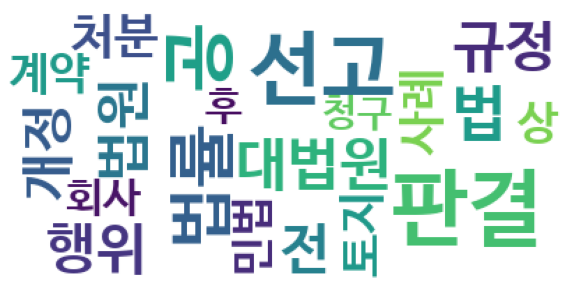

In [168]:
# World
# 많이 나타나는 단어일수록 크게 나타남
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)

In [169]:
from konlpy.tag import Okt
okt = Okt()

oo = okt.pos(posts[0],
        norm=True,   # 정규화(normalization)
        stem=True    # 어간추출(stemming)
        )
print(oo)

[('[', 'Punctuation'), ('1', 'Number'), (']', 'Punctuation'), ('가축', 'Noun'), ('분뇨', 'Noun'), ('의', 'Josa'), ('관리', 'Noun'), ('및', 'Noun'), ('이용', 'Noun'), ('에', 'Josa'), ('관', 'Noun'), ('한', 'Josa'), ('법률', 'Noun'), ('에', 'Josa'), ('따르다', 'Verb'), ('가축', 'Noun'), ('분뇨', 'Noun'), ('처리', 'Noun'), ('방법', 'Noun'), ('변경', 'Noun'), ('허가', 'Noun'), ('가', 'Josa'), ('허가', 'Noun'), ('권', 'Suffix'), ('자의', 'Noun'), ('재량행위', 'Noun'), ('에', 'Josa'), ('해당', 'Noun'), ('하다', 'Verb'), ('여부', 'Noun'), ('(', 'Punctuation'), ('적극', 'Noun'), (')', 'Punctuation'), ('및', 'Noun'), ('가축', 'Noun'), ('분뇨', 'Noun'), ('처리', 'Noun'), ('방법', 'Noun'), ('변경', 'Noun'), ('불허', 'Noun'), ('가처분', 'Noun'), ('에', 'Josa'), ('대한', 'Noun'), ('사법심사', 'Noun'), ('의', 'Josa'), ('대상', 'Noun'), ('과', 'Josa'), ('판단', 'Noun'), ('기준', 'Noun'), ('[', 'Punctuation'), ('2', 'Number'), (']', 'Punctuation'), ('환경', 'Noun'), ('의', 'Josa'), ('훼손', 'Noun'), ('이나', 'Josa'), ('오염', 'Noun'), ('을', 'Josa'), ('발생', 'Noun'), ('시키다', 'Verb'), ('우려', 

In [170]:
# 첫번째 tokenizer
def tokenizer_1(raw_texts, pos=["Noun","Alpha","Verb","Number"], stop_words=list(stop_words_df.get("불용어"))):
    p = okt.pos(raw_texts, 
            norm=True,   # 정규화(normalization)
            stem=True    # 어간추출(stemming)
            )
    o = [word for word, tag in p if len(word) > 1 and tag in pos and word[0] not in stop_words]
    return(o)

tokenizer_1(posts[80])


['재심',
 '청구',
 '받다',
 '법원',
 '당사자',
 '재심',
 '청구',
 '신청',
 '대하',
 '재판',
 '소극',
 '신청',
 '배척',
 '경우',
 '당사자',
 '고지',
 '소극',
 '재심',
 '청구',
 '받다',
 '법원',
 '인정',
 '형사소송법',
 '431조',
 '직권',
 '재심',
 '청구',
 '대한',
 '소송',
 '당사자',
 '신청',
 '당사자',
 '재심',
 '청구',
 '신청',
 '경우',
 '단지',
 '법원',
 '직권',
 '발동',
 '촉구',
 '법원',
 '신청',
 '대하',
 '재판',
 '필요',
 '설령',
 '법원',
 '신청',
 '배척',
 '당사자',
 '고지',
 '필요',
 '형사소송법',
 '420조',
 '431조']

In [171]:
# 두번째 tokenizer
def tokenizer_2(raw_texts, pos=["Noun","Alpha","Verb","Number"], stop_words=list(stop_words_df.get("불용어"))):
    nouns = []
  
    for noun in tagger.nouns(raw_texts):
        if noun not in stop_words and len(noun)>1:
            nouns.append(noun)
    return nouns

tokenizer_2(posts[80])

['재심',
 '청구',
 '법원',
 '당사자',
 '재심',
 '청구',
 '이유',
 '사실',
 '조사',
 '신청',
 '재판',
 '소극',
 '신청',
 '배척',
 '당사자',
 '고지',
 '소극',
 '재심',
 '청구',
 '법원',
 '필요',
 '인정',
 '형사',
 '소송법',
 '직권',
 '재심',
 '청구',
 '이유',
 '사실',
 '조사',
 '소송',
 '당사자',
 '조사',
 '신청',
 '당사자',
 '재심',
 '청구',
 '이유',
 '사실',
 '조사',
 '신청',
 '법원',
 '직권',
 '발동',
 '촉구',
 '의미',
 '법원',
 '신청',
 '재판',
 '필요',
 '법원',
 '신청',
 '배척',
 '당사자',
 '고지',
 '필요',
 '형사',
 '소송법']

# TfidfVectorizer

 TF(Term Frequency) : 특정 단어가 하나의 데이터 안에서 등장하는 횟수

DF(Document Frequency) : 특정 단어가 여러 데이터에 자주 등장하는지를 알려주는 지표.

IDF(Inverse Document Frequency) : DF에 역수를 취해(inverse) 구함

TF-IDF : TF와 IDF를 곱한 값. 즉 TF가 높고, DF가 낮을수록 값이 커지는 것을 이용하는 것입니다.

해당 단위(문장) 안에서는 많이 등장하지만, 다른 문서들까지 전체에서는 적게 사용될수록, 분별력 있는 특징이란 것입니다.

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer(
    tokenizer = tokenizer_1, # 문장에 대한 tokenizer (위에 정의한 함수 이용)
    min_df = 5,            # 단어가 출현하는 최소 문서의 개수
    sublinear_tf = True,    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
    stop_words = list(stop_words_df.get("불용어"))
)

X = vectorize.fit_transform(posts)
pd.DataFrame(X.toarray())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['갖다', '거리', '견지', '결과', '결론', '고려', '공동', '관계', '관련', '근거', '기대', '기점', '기준', '까닭', '낫다', '누가', '다시', '달다', '대로', '대하', '대해', '더불다', '더욱이', '도달', '도착', '동시', '돼다', '되다', '되어다', '두번째', '뒤따르다', '따다', '따르다', '따름', '라면', '리하', '마자', '막론', '만이', '만큼', '만하', '말다', '망정', '몰랏다', '무릎', '반대', '방면', '보다', '보아', '본대', '부류', '불구', '불문', '비걱거리', '비교', '비기다', '비추다', '상대', '생각', '서술', '시오', '시작', '시초', '쓰다', '쓰이다', '안다', '않다', '알다', '연관', '울다', '입다', '입장', '잇따르다', '정도', '종합', '주저', '즈음', '지경', '지다', '진짜', '차다', '켜다', '크다', '틈타다', '편이', '한적', '해도', '해보다', '형식'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,0,1,2,3,4,5,6,7,8,9,...,19318,19319,19320,19321,19322,19323,19324,19325,19326,19327
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# pd.DataFrame(X.toarray()).to_excel("TF-IDF_vectors.xlsx",index=False)

In [173]:
tfidf_df = pd.DataFrame(X.toarray())
# tfidf_df = pd.read_excel("TF-IDF_vectors.xlsx")

In [174]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
# 2번째와 3번째 문서(유클리디안 거리 값)
print(euclidean_distances(X[1], X[2]))#, X)
# 2번째와 3번째 문서(코사인유사도 값)
print(cosine_similarity(X[1], X[2]))#, X)
# [[0.1837195]]

[[1.39203361]]
[[0.03112121]]


In [175]:
info_df[info_df['ID']==target_id].index[0]

0

In [176]:
# target_id 와 유사한 판례를 cosine_similarity으로 계산하여 유사벡터 도출
# 약 25초 소요
cosine_result = {}
target_id = 216815
x = info_df[info_df['ID']==target_id].index[0]  # target_id의 Id값의 index
for y in range(len(info_df)):
    cosine_result[info_df['ID'][y]] = cosine_similarity(X[x], X[y])[0][0]
sorted_cosine_dic = sorted(cosine_result.items(), key = lambda x:x[1], reverse = True)

# cosine_similariry 값 기준으로 내림차순 정렬된 유사 판례들
# 먼저나올수록 유사한 판례이다.
sorted_cosine_dic 

[(216815, 1.0000000000000002),
 (215147, 0.520924137849746),
 (184531, 0.39317829943396776),
 (186103, 0.3825666942276965),
 (213789, 0.3774339399795226),
 (177477, 0.37264539991694684),
 (204626, 0.3641783769488764),
 (173157, 0.3558713026288929),
 (177332, 0.33015633962951374),
 (154390, 0.32566319453995207),
 (161708, 0.3241639426964902),
 (212873, 0.30815808458353783),
 (182956, 0.30018304459520495),
 (180199, 0.2893571033871051),
 (185882, 0.28886440944101865),
 (160418, 0.28675191130934646),
 (203017, 0.2847660728226796),
 (190771, 0.2844559513871012),
 (178873, 0.2800978808436919),
 (206096, 0.2693501736037048),
 (193350, 0.2689748724346621),
 (64477, 0.26867364050201814),
 (191564, 0.25706449873995696),
 (196396, 0.25199334680297897),
 (191203, 0.25052594506486553),
 (204929, 0.24643952796397822),
 (184828, 0.2423121288804263),
 (194157, 0.23689581743791835),
 (209909, 0.23469572722212623),
 (204352, 0.2332508657850475),
 (204513, 0.23291937801055912),
 (194985, 0.2318904950939

In [177]:
# target_id 에 해당하는 판례와 유사한 판례 상위 10개 도출
for id_ in sorted_cosine_dic[0:11]:
    url = "http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID={}&type=HTML".format(id_[0])
    url2 = "https://www.law.go.kr/precInfoP.do?mode=0&precSeq={}&vSct=*".format(id_[0])
    print(url2)

https://www.law.go.kr/precInfoP.do?mode=0&precSeq=216815&vSct=*
https://www.law.go.kr/precInfoP.do?mode=0&precSeq=215147&vSct=*
https://www.law.go.kr/precInfoP.do?mode=0&precSeq=184531&vSct=*
https://www.law.go.kr/precInfoP.do?mode=0&precSeq=186103&vSct=*
https://www.law.go.kr/precInfoP.do?mode=0&precSeq=213789&vSct=*
https://www.law.go.kr/precInfoP.do?mode=0&precSeq=177477&vSct=*
https://www.law.go.kr/precInfoP.do?mode=0&precSeq=204626&vSct=*
https://www.law.go.kr/precInfoP.do?mode=0&precSeq=173157&vSct=*
https://www.law.go.kr/precInfoP.do?mode=0&precSeq=177332&vSct=*
https://www.law.go.kr/precInfoP.do?mode=0&precSeq=154390&vSct=*
https://www.law.go.kr/precInfoP.do?mode=0&precSeq=161708&vSct=*


In [ ]:
# 모든 조에 해당하는 cosine similarity 결과 값을
# DataFrame 형태로 변환
cosine_result_df = pd.DataFrame(cosine_result)
cosine_result_df